### Code 1

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


####  Download Financial Stock Data

In [4]:
# Set time range
years = 15
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365 * years)

# Download data
assets = ["VTI", "SPY", "QQQ"]
df = yf.download(assets, start=startDate, end=endDate, auto_adjust=False)["Adj Close"]


[*********************100%***********************]  3 of 3 completed


In [5]:
df.plot(figsize=(14, 6), title="Adjusted Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()


#### Calculate Daily Returns

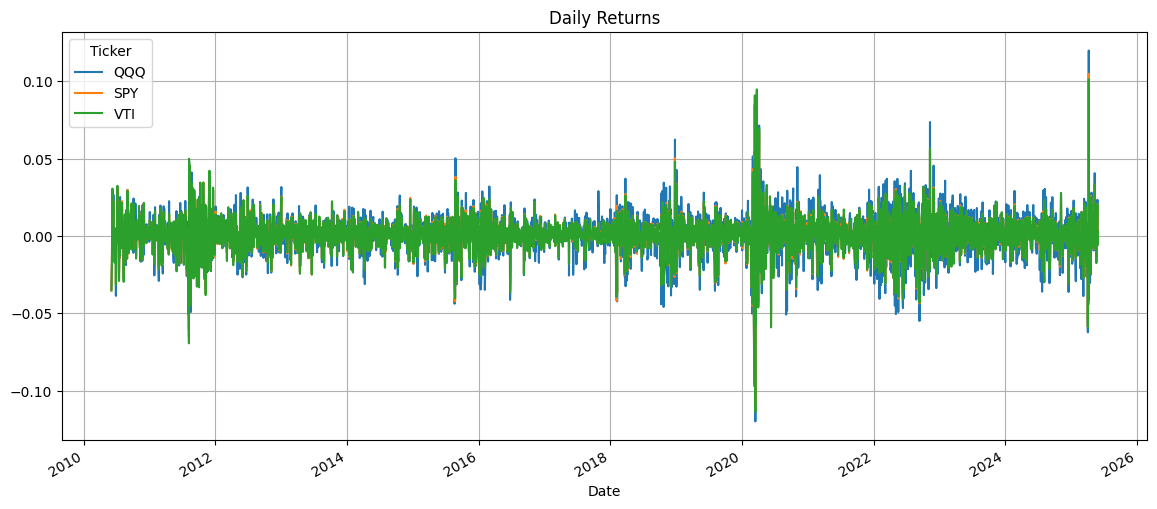

In [6]:
returns = df.pct_change().dropna()
returns.plot(figsize=(14, 6), title="Daily Returns")
plt.grid(True)
plt.show()


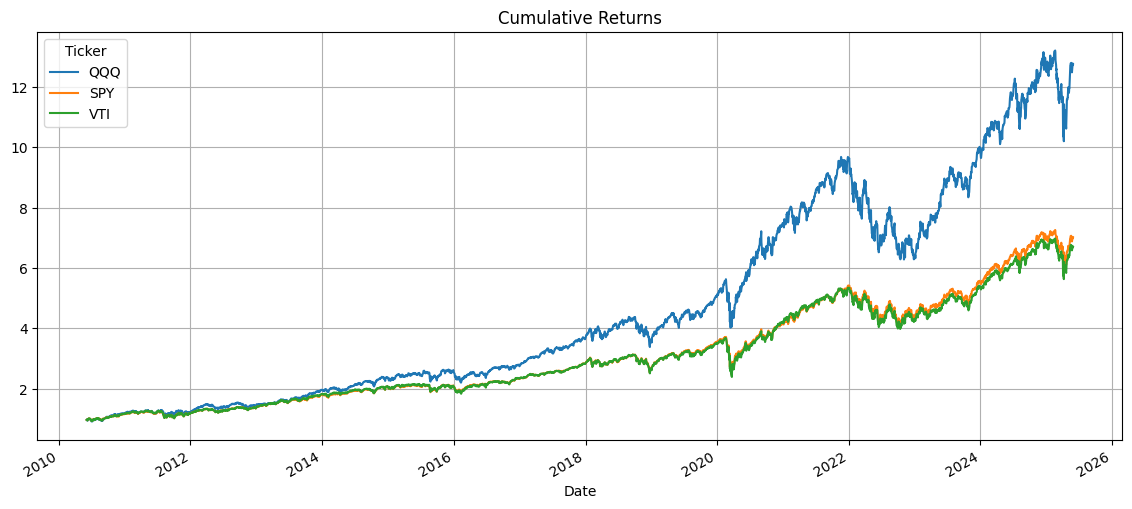

In [7]:
cumulative_returns = (1 + returns).cumprod()
cumulative_returns.plot(figsize=(14, 6), title="Cumulative Returns")
plt.grid(True)
plt.show()


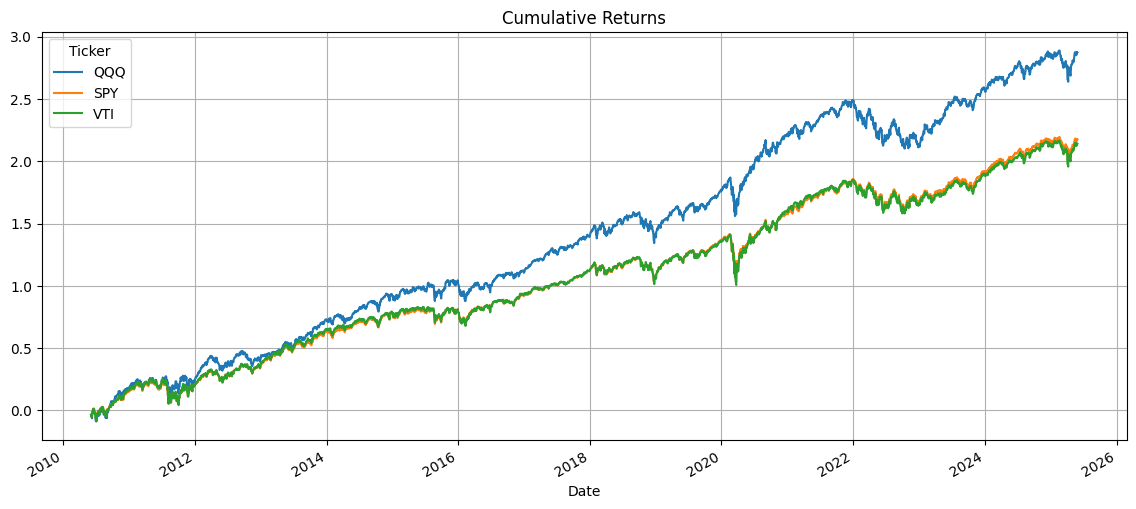

In [9]:
cumusum_returns = returns.cumsum()
cumusum_returns.plot(figsize=(14, 6), title="Cumulative Returns")
plt.grid(True)
plt.show()

#### Rolling Mean and Volatility

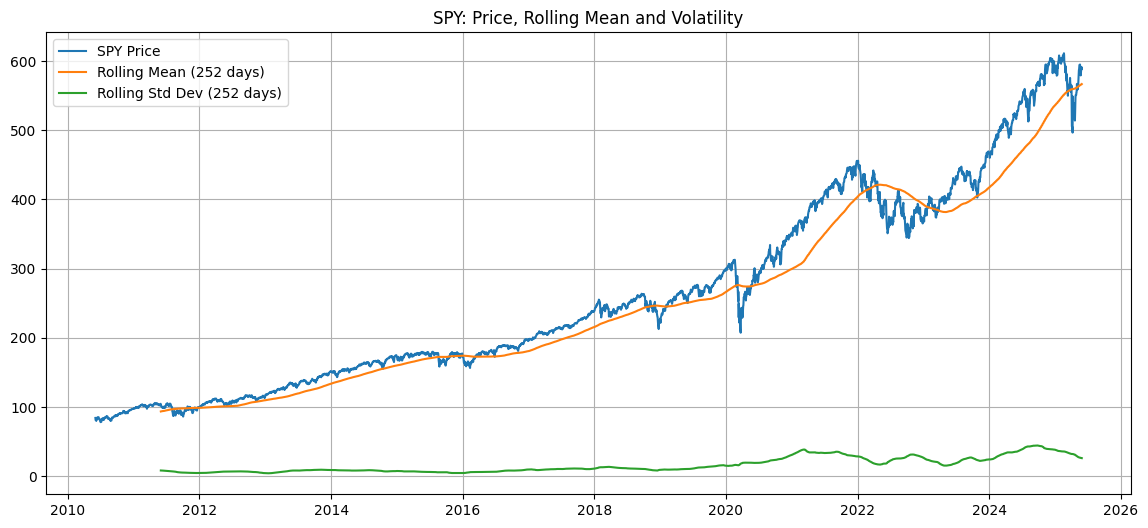

In [10]:
rolling_mean = df.rolling(window=252).mean()
rolling_std = df.rolling(window=252).std()

plt.figure(figsize=(14, 6))
plt.plot(df["SPY"], label='SPY Price')
plt.plot(rolling_mean["SPY"], label='Rolling Mean (252 days)')
plt.plot(rolling_std["SPY"], label='Rolling Std Dev (252 days)')
plt.legend()
plt.title("SPY: Price, Rolling Mean and Volatility")
plt.grid(True)
plt.show()


#### Decompose Time Series (Trend, Seasonality, Residuals)

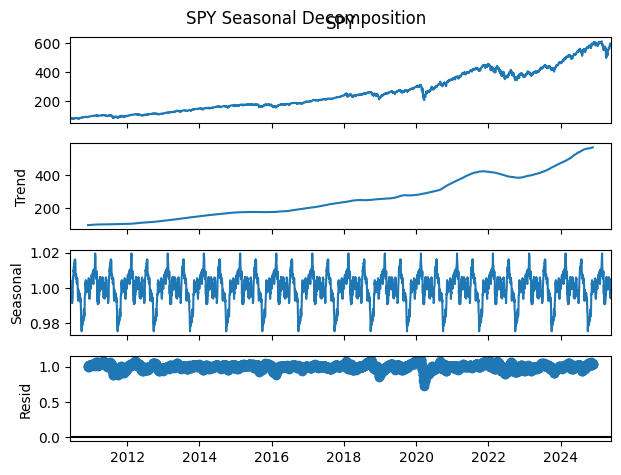

In [11]:
result = seasonal_decompose(df["SPY"].dropna(), model='multiplicative', period=252)
result.plot()
plt.suptitle("SPY Seasonal Decomposition")
plt.show()


#### Check Stationarity using ADF Test

In [12]:
def adf_test(series):
    result = adfuller(series.dropna())
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("✅ Stationary")
    else:
        print("❌ Non-stationary")

adf_test(df["SPY"])


ADF Statistic: 1.0643095766839972
p-value: 0.9949002082246177
❌ Non-stationary


#### Plot ACF and PACF

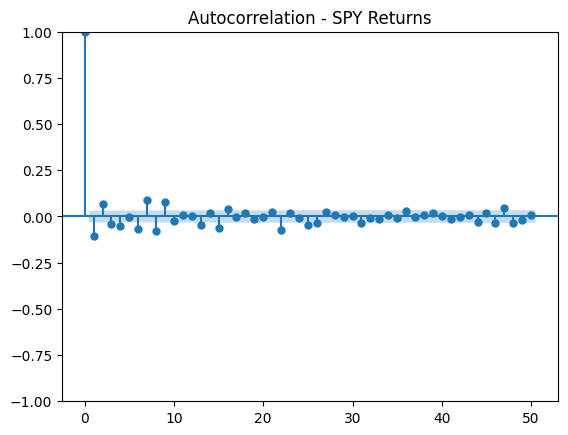

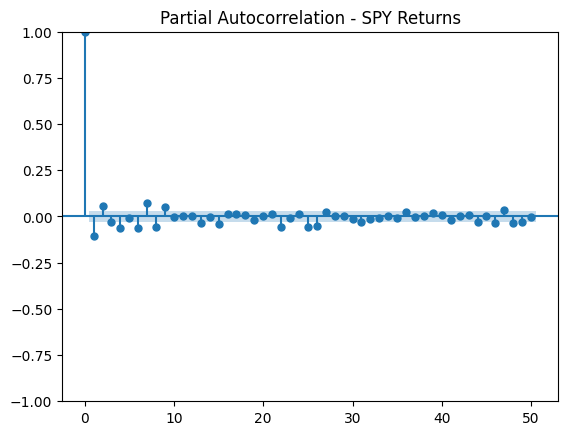

In [13]:
plot_acf(df["SPY"].dropna().pct_change().dropna(), lags=50)
plt.title("Autocorrelation - SPY Returns")
plt.show()

plot_pacf(df["SPY"].dropna().pct_change().dropna(), lags=50)
plt.title("Partial Autocorrelation - SPY Returns")
plt.show()


#### ARIMA Model & Forecasting

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anac

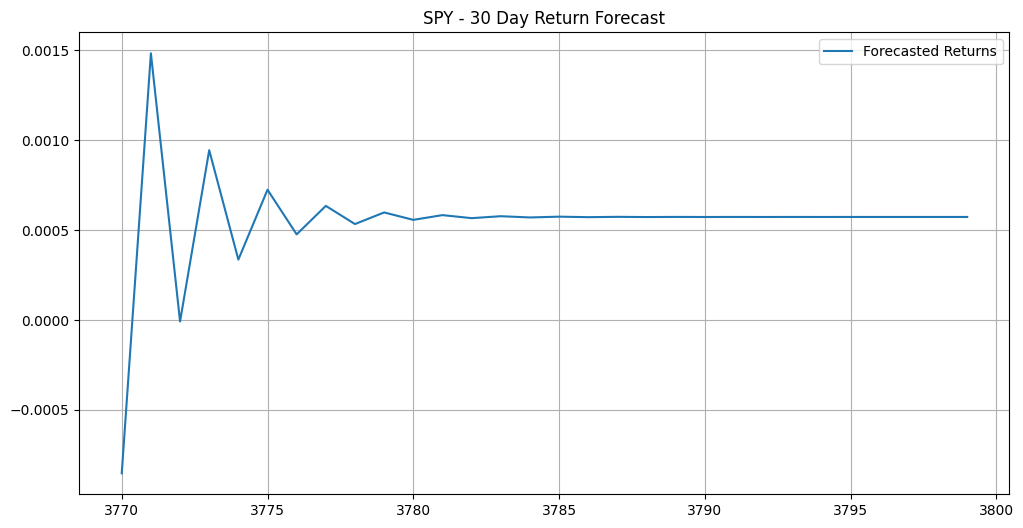

In [14]:
# Differencing to make stationary
returns_spy = df["SPY"].pct_change().dropna()

# Fit ARIMA
model = ARIMA(returns_spy, order=(1, 0, 1))  # adjust p, d, q as needed
fitted_model = model.fit()

# Forecast next 30 days
forecast = fitted_model.forecast(steps=30)
plt.figure(figsize=(12, 6))
plt.plot(forecast, label="Forecasted Returns")
plt.title("SPY - 30 Day Return Forecast")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
correlation_matrix = returns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation of Returns")
plt.show()


#### stability

In [16]:
# First difference of price
spy_diff = df["SPY"].diff().dropna()

# Check stationarity again
adf_result = adfuller(spy_diff)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] < 0.05:
    print("✅ Stationary")
else:
    print("❌ Still Non-stationary")


ADF Statistic: -12.318594615736957
p-value: 6.831912476260095e-23
✅ Stationary


In [17]:
plt.figure(figsize=(14, 5))
plt.plot(spy_diff)
plt.title("SPY - First Differenced (Stationary) Series")
plt.grid(True)
plt.show()


In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df["SPY"], order=(1, 1, 1))  # (p=1, d=1, q=1) - adjust as needed
model_fit = model.fit()
print(model_fit.summary())


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    SPY   No. Observations:                 3771
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9833.754
Date:                Fri, 30 May 2025   AIC                          19673.507
Time:                        16:32:47   BIC                          19692.212
Sample:                             0   HQIC                         19680.157
                               - 3771                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4561      0.070     -6.528      0.000      -0.593      -0.319
ma.L1          0.3766      0.072      5.207      0.000       0.235       0.518
sigma2        10.7939      0.067    160.628      0.0

In [25]:
# Ensure DatetimeIndex
df.index = pd.to_datetime(df.index)

# Reassign after differencing to keep datetime index
spy_diff = df["SPY"].diff().dropna()
spy_diff.index = pd.to_datetime(spy_diff.index)

# Ensure index is datetime and has frequency (assume business day frequency for stock data)
df.index = pd.to_datetime(df.index)
df = df.asfreq('B')  # 'B' = Business day frequency

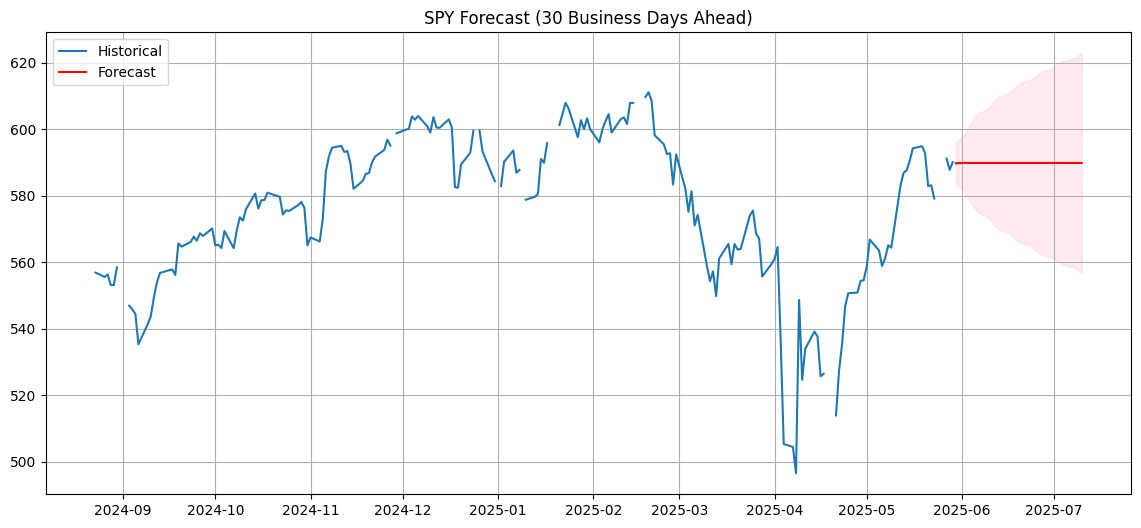

In [26]:
# Fit ARIMA on price with proper index
model = ARIMA(df["SPY"], order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 30 steps
forecast = model_fit.get_forecast(steps=30)

# Get forecasted mean and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Create future date range for plotting
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='B')  # 'B' = business days

# Plot forecast
plt.figure(figsize=(14, 6))
plt.plot(df["SPY"].iloc[-200:], label="Historical")
plt.plot(future_dates, forecast_mean.values, label="Forecast", color="red")
plt.fill_between(future_dates,
                 forecast_ci.iloc[:, 0].values,
                 forecast_ci.iloc[:, 1].values,
                 color="pink", alpha=0.3)
plt.title("SPY Forecast (30 Business Days Ahead)")
plt.legend()
plt.grid(True)
plt.show()


### Code 2

In [31]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Statistical and econometric libraries
from statsmodels.tsa.stattools import adfuller, coint, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [34]:
years = 15
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)
assets = ["VTI", "SPY", "QQQ"]

df = yf.download(assets, start=startDate, end=endDate, auto_adjust=False)["Adj Close"]
print(df.head())
print(df.isnull().sum())

[*********************100%***********************]  3 of 3 completed

Ticker            QQQ        SPY        VTI
Date                                       
2010-06-03  40.764774  84.130638  43.270866
2010-06-04  39.367828  81.174561  41.751114
2010-06-07  38.651882  80.163879  41.071423
2010-06-08  38.582027  81.022598  41.422729
2010-06-09  38.258987  80.589432  41.231812
Ticker
QQQ    0
SPY    0
VTI    0
dtype: int64


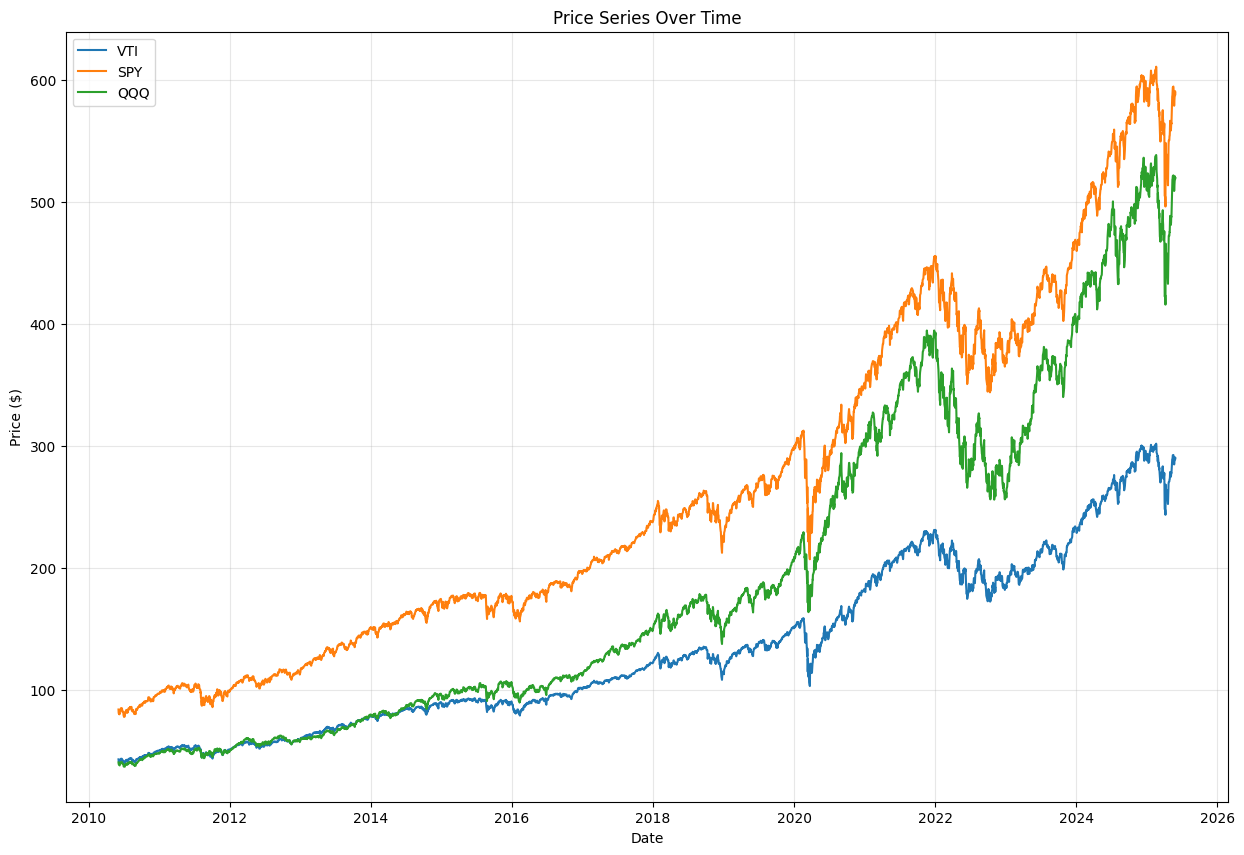

In [38]:
# Plot price series
plt.figure(figsize=(15, 10))
for asset in assets:
    plt.plot(df.index, df[asset], label=asset, linewidth=1.5)
plt.title('Price Series Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)

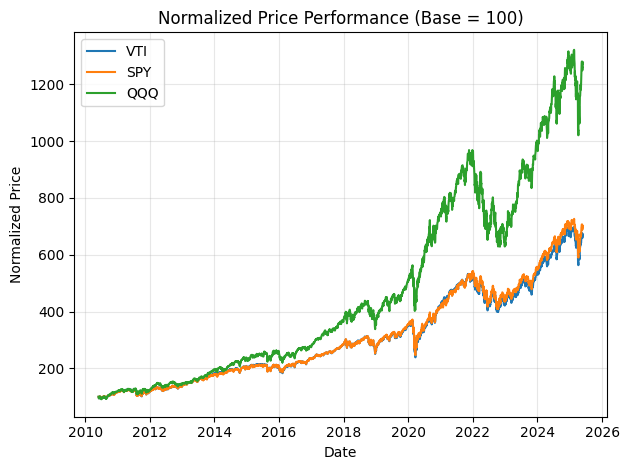

In [37]:
normalized_prices = df.div(df.iloc[0]) * 100

plt.figure()
for asset in assets:
    plt.plot(normalized_prices.index, normalized_prices[asset], label=asset, linewidth=1.5)
plt.title('Normalized Price Performance (Base = 100)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

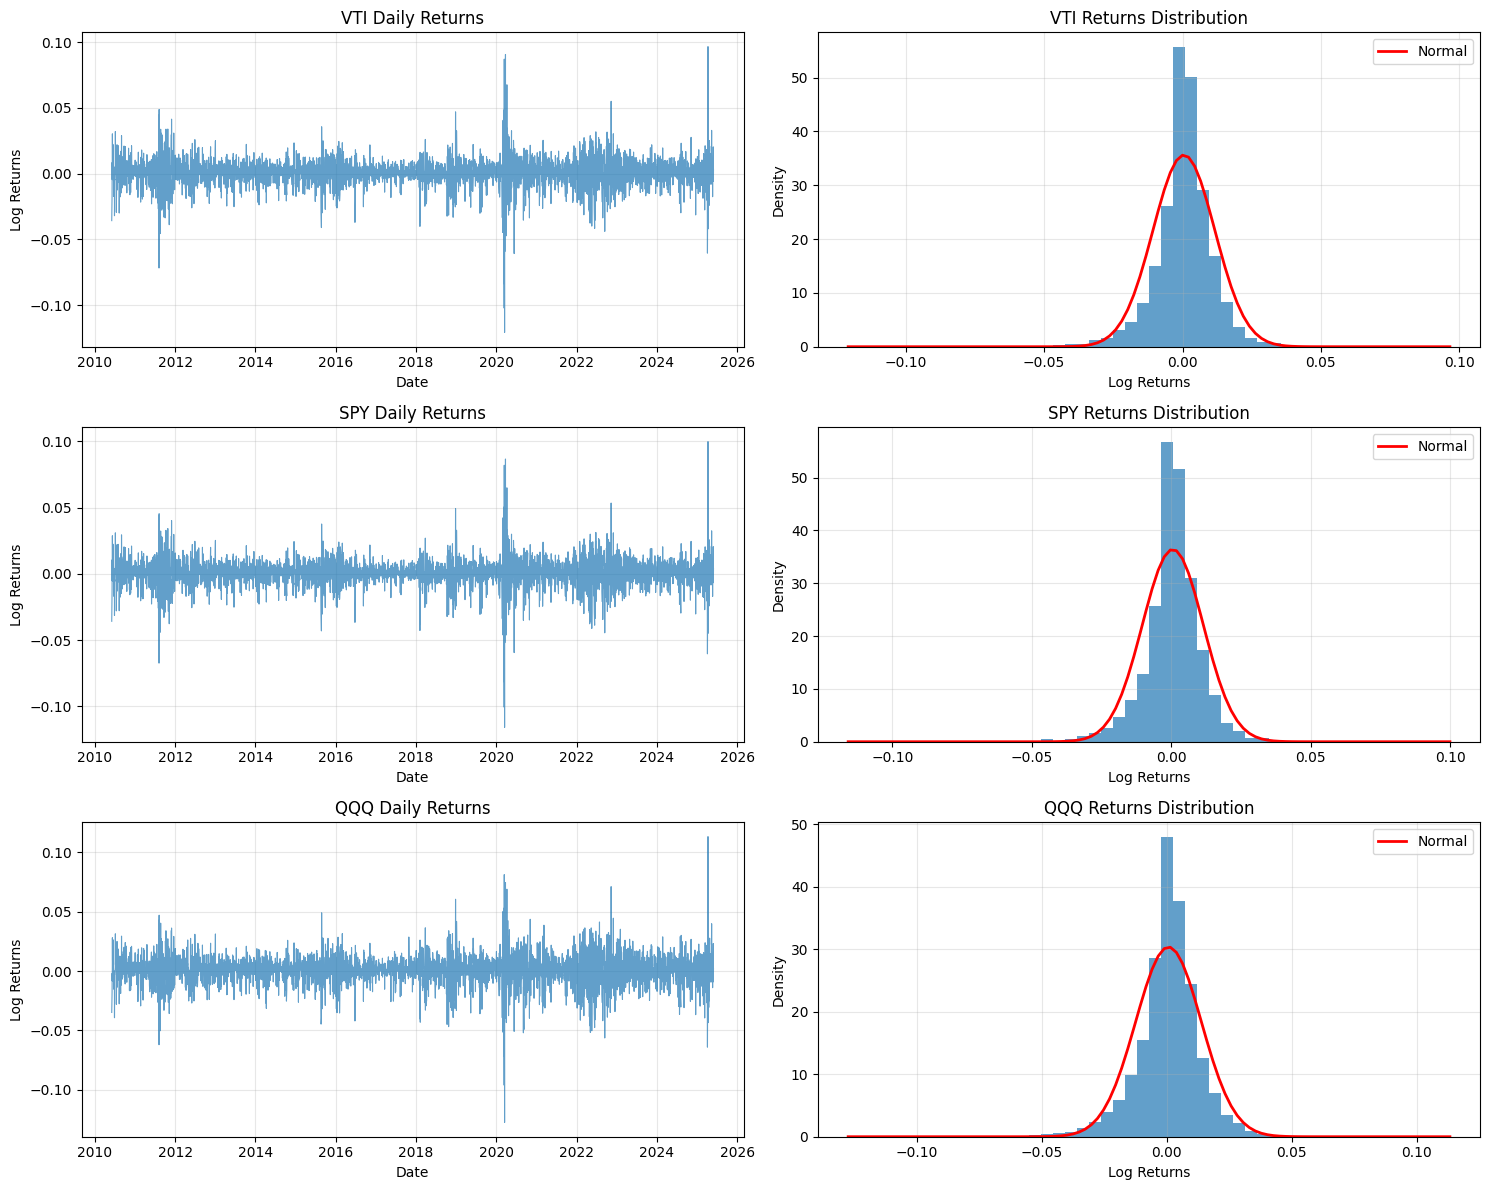

In [39]:
returns = np.log(df / df.shift(1)).dropna()

plt.figure(figsize=(15, 12))

for i, asset in enumerate(assets, 1):
    plt.subplot(3, 2, 2*i-1)
    plt.plot(returns.index, returns[asset], alpha=0.7, linewidth=0.8)
    plt.title(f'{asset} Daily Returns')
    plt.xlabel('Date')
    plt.ylabel('Log Returns')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(3, 2, 2*i)
    plt.hist(returns[asset], bins=50, alpha=0.7, density=True)
    plt.title(f'{asset} Returns Distribution')
    plt.xlabel('Log Returns')
    plt.ylabel('Density')
    # Add normal distribution overlay
    mu, sigma = returns[asset].mean(), returns[asset].std()
    x = np.linspace(returns[asset].min(), returns[asset].max(), 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [40]:
cumulative_returns = (1 + returns).cumprod() - 1

print("\nCumulative Returns (Final):")
for asset in assets:
    final_return = cumulative_returns[asset].iloc[-1]
    print(f"{asset}: {final_return:.2%}")


Cumulative Returns (Final):
VTI: 428.47%
SPY: 458.60%
QQQ: 819.23%


Average Annualized Volatility:
VTI: 16.37%
SPY: 16.01%
QQQ: 19.63%


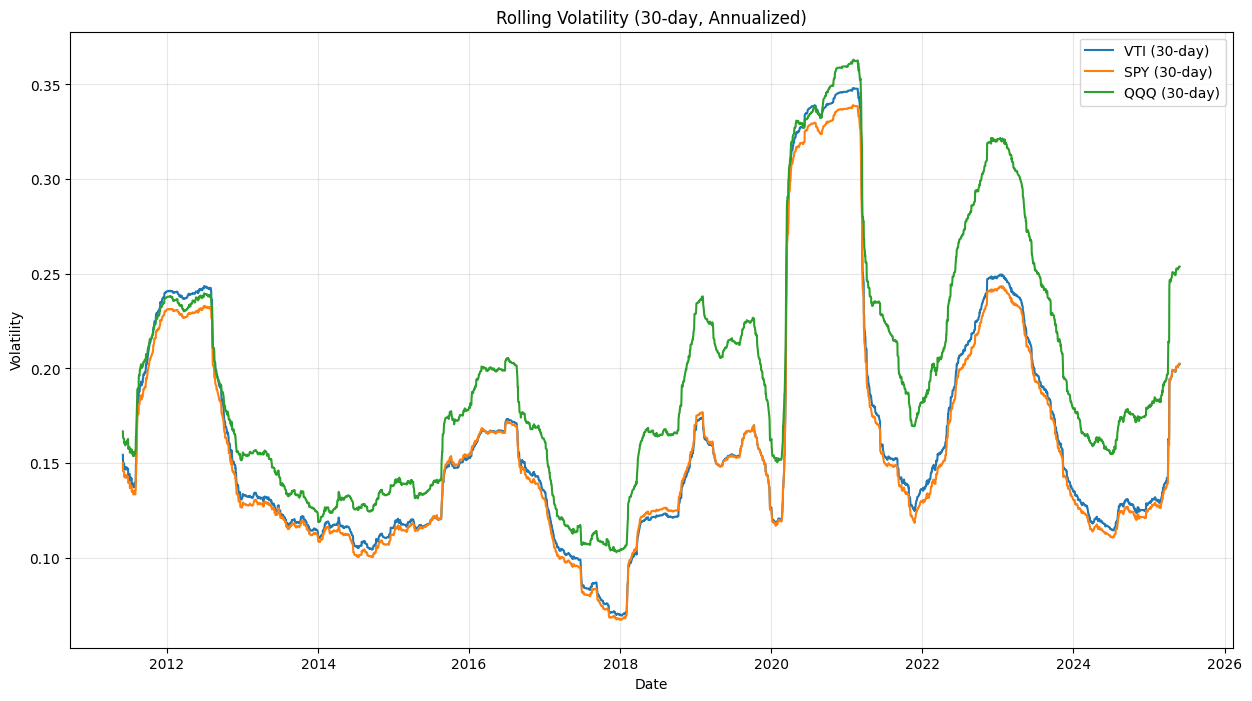

In [42]:
rolling_vol = returns.rolling(window=252).std() * np.sqrt(252)  # Annualized

print("Average Annualized Volatility:")
for asset in assets:
    avg_vol = rolling_vol[asset].mean()
    print(f"{asset}: {avg_vol:.2%}")

# Plot rolling volatility
plt.figure(figsize=(15, 8))
for asset in assets:
    plt.plot(rolling_vol.index, rolling_vol[asset], label=f'{asset} (30-day)', linewidth=1.5)
plt.title('Rolling Volatility (30-day, Annualized)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [43]:
print("\nGARCH Model Analysis for VTI:")
try:
    # Fit GARCH(1,1) model
    garch_model = arch_model(returns['VTI'] * 100, vol='Garch', p=1, q=1)
    garch_fitted = garch_model.fit(disp='off')
    print(garch_fitted.summary())
    
    # Plot conditional volatility
    plt.figure(figsize=(12, 6))
    plt.plot(returns.index, garch_fitted.conditional_volatility, label='GARCH Volatility')
    plt.plot(rolling_vol.index, rolling_vol['VTI'] * 100, label='Rolling Volatility', alpha=0.7)
    plt.title('VTI: GARCH vs Rolling Volatility')
    plt.xlabel('Date')
    plt.ylabel('Volatility (%)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
except Exception as e:
    print(f"GARCH model error: {e}")


GARCH Model Analysis for VTI:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    VTI   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4942.35
Distribution:                  Normal   AIC:                           9892.69
Method:            Maximum Likelihood   BIC:                           9917.63
                                        No. Observations:                 3770
Date:                Fri, May 30 2025   Df Residuals:                     3769
Time:                        17:03:31   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0832  1.256e-02 

In [44]:
# ============================================================================
# STEP 5: STATIONARITY TESTING
# ============================================================================

print("\n\n5. STATIONARITY TESTING")
print("-" * 50)

def stationarity_tests(series, name):
    """Perform ADF and KPSS tests for stationarity"""
    print(f"\nStationarity Tests for {name}:")
    
    # Augmented Dickey-Fuller test
    adf_result = adfuller(series.dropna())
    print(f"ADF Test - p-value: {adf_result[1]:.4f}")
    if adf_result[1] <= 0.05:
        print("ADF: Series is stationary (reject null hypothesis)")
    else:
        print("ADF: Series is non-stationary (fail to reject null hypothesis)")
    
    # KPSS test
    try:
        kpss_result = kpss(series.dropna())
        print(f"KPSS Test - p-value: {kpss_result[1]:.4f}")
        if kpss_result[1] >= 0.05:
            print("KPSS: Series is stationary (fail to reject null hypothesis)")
        else:
            print("KPSS: Series is non-stationary (reject null hypothesis)")
    except Exception as e:
        print(f"KPSS test error: {e}")

# Test prices (should be non-stationary)
for asset in assets:
    stationarity_tests(df[asset], f"{asset} Prices")

# Test returns (should be stationary)
for asset in assets:
    stationarity_tests(returns[asset], f"{asset} Returns")



5. STATIONARITY TESTING
--------------------------------------------------

Stationarity Tests for VTI Prices:
ADF Test - p-value: 0.9912
ADF: Series is non-stationary (fail to reject null hypothesis)
KPSS Test - p-value: 0.0100
KPSS: Series is non-stationary (reject null hypothesis)

Stationarity Tests for SPY Prices:
ADF Test - p-value: 0.9949
ADF: Series is non-stationary (fail to reject null hypothesis)
KPSS Test - p-value: 0.0100
KPSS: Series is non-stationary (reject null hypothesis)

Stationarity Tests for QQQ Prices:
ADF Test - p-value: 0.9957
ADF: Series is non-stationary (fail to reject null hypothesis)
KPSS Test - p-value: 0.0100
KPSS: Series is non-stationary (reject null hypothesis)

Stationarity Tests for VTI Returns:
ADF Test - p-value: 0.0000
ADF: Series is stationary (reject null hypothesis)
KPSS Test - p-value: 0.1000
KPSS: Series is stationary (fail to reject null hypothesis)

Stationarity Tests for SPY Returns:
ADF Test - p-value: 0.0000
ADF: Series is stationary 



6. CORRELATION AND COINTEGRATION ANALYSIS
--------------------------------------------------
Static Correlation Matrix (Returns):
Ticker       QQQ       SPY       VTI
Ticker                              
QQQ     1.000000  0.931390  0.927869
SPY     0.931390  1.000000  0.996109
VTI     0.927869  0.996109  1.000000


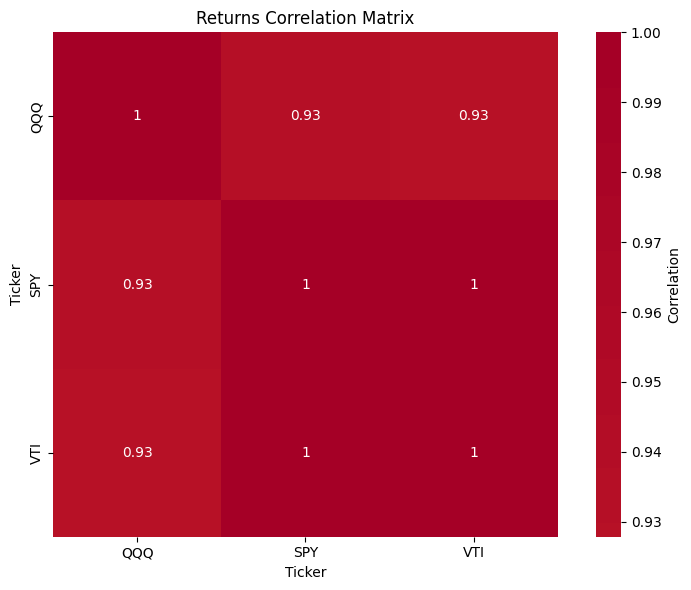

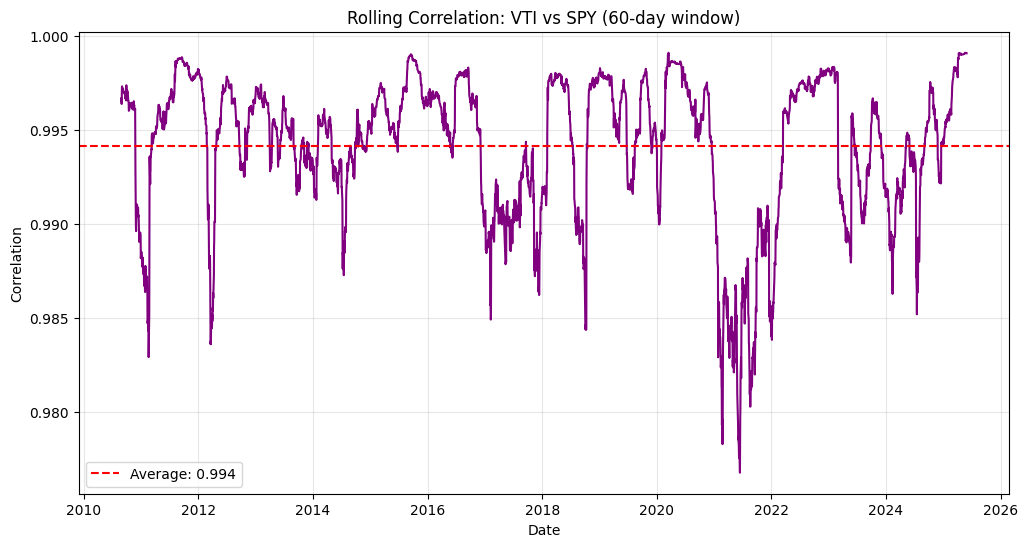


Cointegration Tests:
VTI vs SPY: p-value = 0.6541
  -> VTI and SPY are not cointegrated
VTI vs QQQ: p-value = 0.2554
  -> VTI and QQQ are not cointegrated
SPY vs QQQ: p-value = 0.2480
  -> SPY and QQQ are not cointegrated


In [45]:
# ============================================================================
# STEP 6: CORRELATION AND COINTEGRATION ANALYSIS
# ============================================================================

print("\n\n6. CORRELATION AND COINTEGRATION ANALYSIS")
print("-" * 50)

# Static correlation matrix
print("Static Correlation Matrix (Returns):")
correlation_matrix = returns.corr()
print(correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            square=True, cbar_kws={'label': 'Correlation'})
plt.title('Returns Correlation Matrix')
plt.tight_layout()
plt.show()

# Rolling correlation (VTI vs SPY)
rolling_corr = returns['VTI'].rolling(window=60).corr(returns['SPY'])

plt.figure(figsize=(12, 6))
plt.plot(rolling_corr.index, rolling_corr, linewidth=1.5, color='purple')
plt.title('Rolling Correlation: VTI vs SPY (60-day window)')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.axhline(y=rolling_corr.mean(), color='red', linestyle='--', 
            label=f'Average: {rolling_corr.mean():.3f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Cointegration testing
print("\nCointegration Tests:")
for i in range(len(assets)):
    for j in range(i+1, len(assets)):
        asset1, asset2 = assets[i], assets[j]
        try:
            coint_result = coint(df[asset1], df[asset2])
            print(f"{asset1} vs {asset2}: p-value = {coint_result[1]:.4f}")
            if coint_result[1] <= 0.05:
                print(f"  -> {asset1} and {asset2} are cointegrated")
            else:
                print(f"  -> {asset1} and {asset2} are not cointegrated")
        except Exception as e:
            print(f"Cointegration test error for {asset1} vs {asset2}: {e}")



7. TECHNICAL INDICATORS
--------------------------------------------------


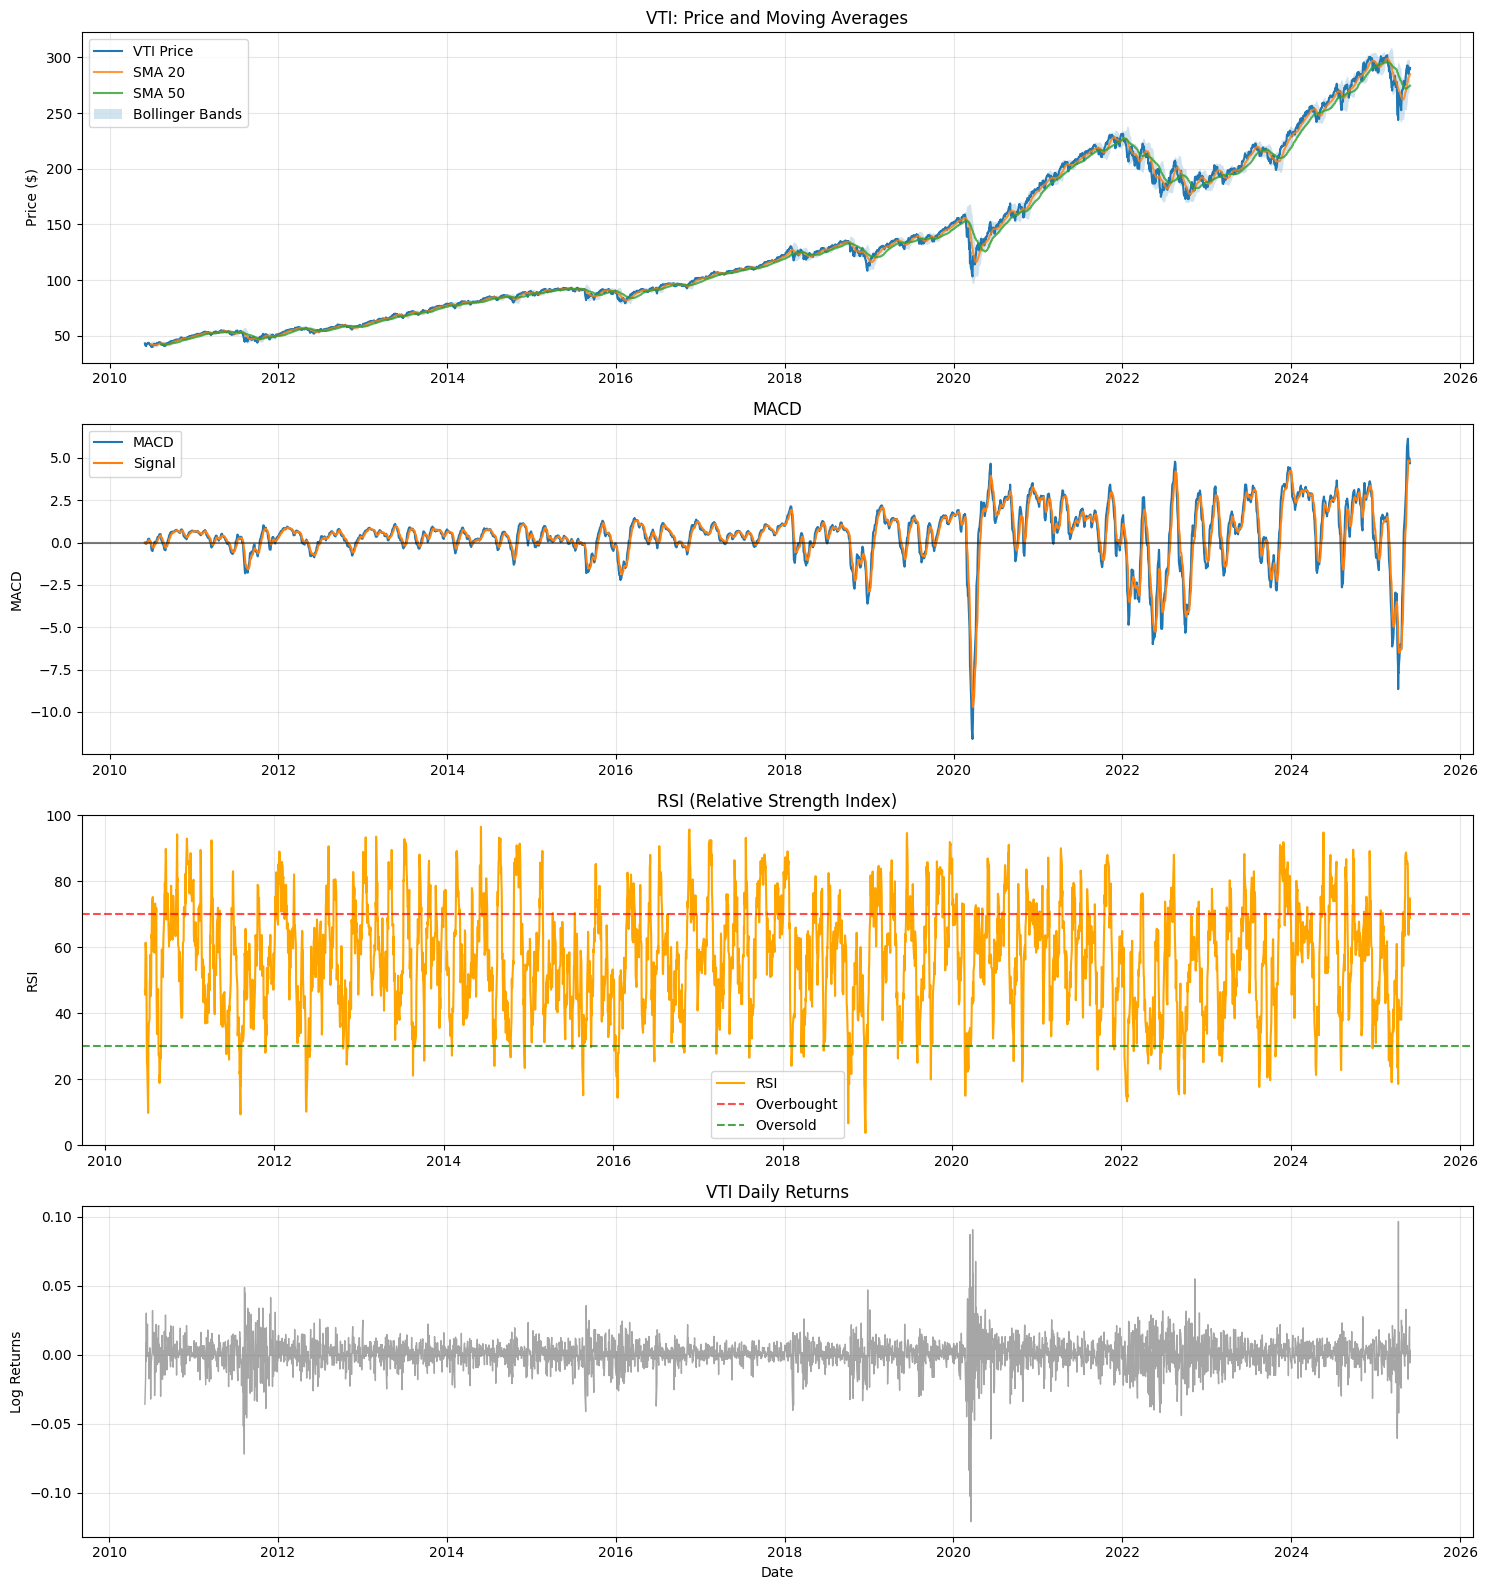

In [46]:
# ============================================================================
# STEP 7: TECHNICAL INDICATORS
# ============================================================================

print("\n\n7. TECHNICAL INDICATORS")
print("-" * 50)

def calculate_technical_indicators(prices):
    """Calculate various technical indicators"""
    indicators = pd.DataFrame(index=prices.index)
    
    # Moving averages
    indicators['SMA_20'] = prices.rolling(window=20).mean()
    indicators['SMA_50'] = prices.rolling(window=50).mean()
    indicators['EMA_12'] = prices.ewm(span=12).mean()
    indicators['EMA_26'] = prices.ewm(span=26).mean()
    
    # MACD
    indicators['MACD'] = indicators['EMA_12'] - indicators['EMA_26']
    indicators['MACD_Signal'] = indicators['MACD'].ewm(span=9).mean()
    
    # RSI
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    indicators['RSI'] = 100 - (100 / (1 + rs))
    
    # Bollinger Bands
    sma_20 = indicators['SMA_20']
    std_20 = prices.rolling(window=20).std()
    indicators['BB_Upper'] = sma_20 + (std_20 * 2)
    indicators['BB_Lower'] = sma_20 - (std_20 * 2)
    
    return indicators

# Calculate indicators for VTI
vti_indicators = calculate_technical_indicators(df['VTI'])

# Plot technical analysis for VTI
fig, axes = plt.subplots(4, 1, figsize=(15, 16))

# Price and moving averages
axes[0].plot(df.index, df['VTI'], label='VTI Price', linewidth=1.5)
axes[0].plot(vti_indicators.index, vti_indicators['SMA_20'], label='SMA 20', alpha=0.8)
axes[0].plot(vti_indicators.index, vti_indicators['SMA_50'], label='SMA 50', alpha=0.8)
axes[0].fill_between(vti_indicators.index, vti_indicators['BB_Lower'], 
                     vti_indicators['BB_Upper'], alpha=0.2, label='Bollinger Bands')
axes[0].set_title('VTI: Price and Moving Averages')
axes[0].set_ylabel('Price ($)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# MACD
axes[1].plot(vti_indicators.index, vti_indicators['MACD'], label='MACD', linewidth=1.5)
axes[1].plot(vti_indicators.index, vti_indicators['MACD_Signal'], label='Signal', linewidth=1.5)
axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
axes[1].set_title('MACD')
axes[1].set_ylabel('MACD')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# RSI
axes[2].plot(vti_indicators.index, vti_indicators['RSI'], label='RSI', linewidth=1.5, color='orange')
axes[2].axhline(y=70, color='red', linestyle='--', alpha=0.7, label='Overbought')
axes[2].axhline(y=30, color='green', linestyle='--', alpha=0.7, label='Oversold')
axes[2].set_title('RSI (Relative Strength Index)')
axes[2].set_ylabel('RSI')
axes[2].set_ylim(0, 100)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# Volume (if available, otherwise returns)
axes[3].plot(returns.index, returns['VTI'], linewidth=1, alpha=0.7, color='gray')
axes[3].set_title('VTI Daily Returns')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Log Returns')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



8. SEASONAL DECOMPOSITION
--------------------------------------------------
Monthly Returns Statistics:
Ticker         QQQ         SPY         VTI
count   180.000000  180.000000  180.000000
mean      0.014144    0.010821    0.010571
std       0.050001    0.041716    0.043209
min      -0.146133   -0.133385   -0.149495
25%      -0.016014   -0.013458   -0.015257
50%       0.019284    0.017224    0.016397
75%       0.047990    0.036377    0.036526
max       0.139534    0.119545    0.123396


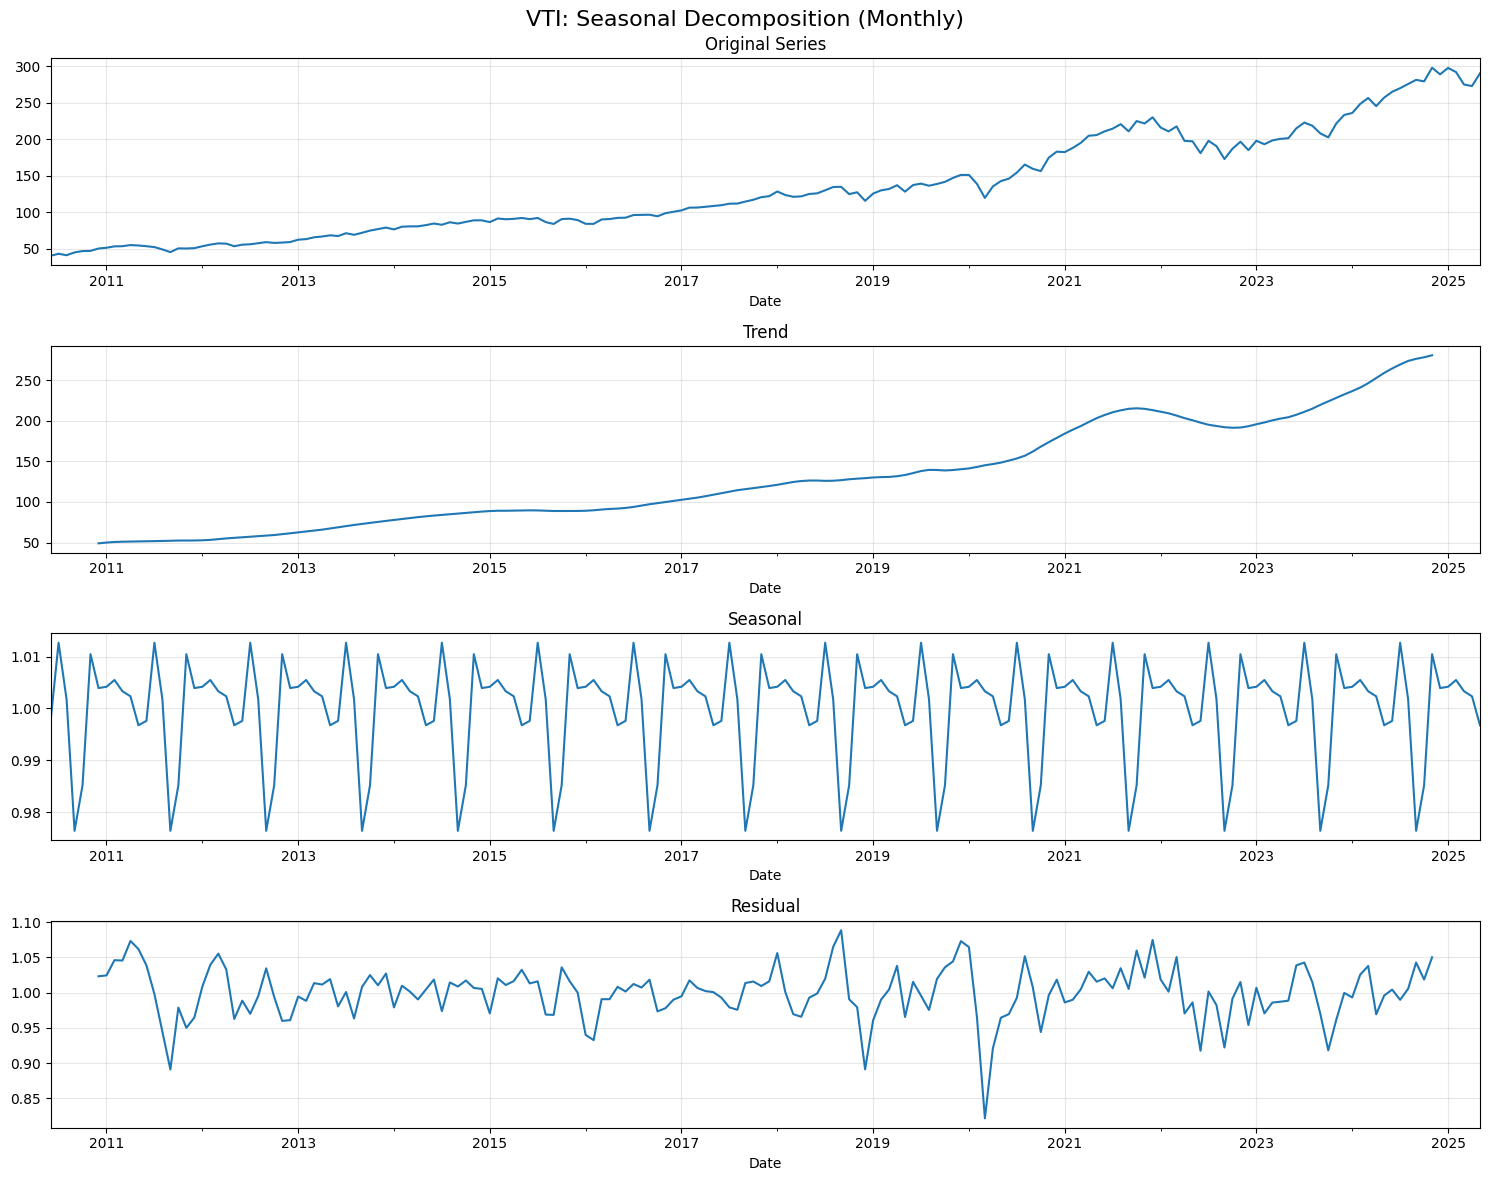


Day of Week Effect (Average Returns):
Ticker          VTI       SPY       QQQ
Monday     0.000088  0.000182  0.000601
Tuesday    0.000855  0.000839  0.001253
Wednesday  0.000606  0.000650  0.000992
Thursday   0.000373  0.000375  0.000320
Friday     0.000563  0.000505  0.000187


In [47]:
# ============================================================================
# STEP 8: SEASONAL DECOMPOSITION
# ============================================================================

print("\n\n8. SEASONAL DECOMPOSITION")
print("-" * 50)

# Monthly resampling for seasonal analysis
monthly_prices = df.resample('M').last()
monthly_returns = returns.resample('M').sum()

print("Monthly Returns Statistics:")
print(monthly_returns.describe())

# Seasonal decomposition for VTI
try:
    decomposition = seasonal_decompose(monthly_prices['VTI'], model='multiplicative', period=12)
    
    fig, axes = plt.subplots(4, 1, figsize=(15, 12))
    decomposition.observed.plot(ax=axes[0], title='Original Series')
    decomposition.trend.plot(ax=axes[1], title='Trend')
    decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
    decomposition.resid.plot(ax=axes[3], title='Residual')
    
    for ax in axes:
        ax.grid(True, alpha=0.3)
    
    plt.suptitle('VTI: Seasonal Decomposition (Monthly)', fontsize=16)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Seasonal decomposition error: {e}")

# Day of week analysis
returns_with_dow = returns.copy()
returns_with_dow['DayOfWeek'] = returns_with_dow.index.dayofweek

print("\nDay of Week Effect (Average Returns):")
dow_effects = returns_with_dow.groupby('DayOfWeek')[assets].mean()
dow_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
dow_effects.index = dow_names
print(dow_effects)




9. RISK METRICS
--------------------------------------------------
Risk Metrics:
       VaR_5%   CVaR_5%  Max_Drawdown  Sharpe_Ratio  Volatility
QQQ -0.021260 -0.032007     -0.385021      0.719623    0.208686
SPY -0.016668 -0.026903     -0.357459      0.633692    0.173902
VTI -0.017010 -0.027446     -0.370847      0.602816    0.177817


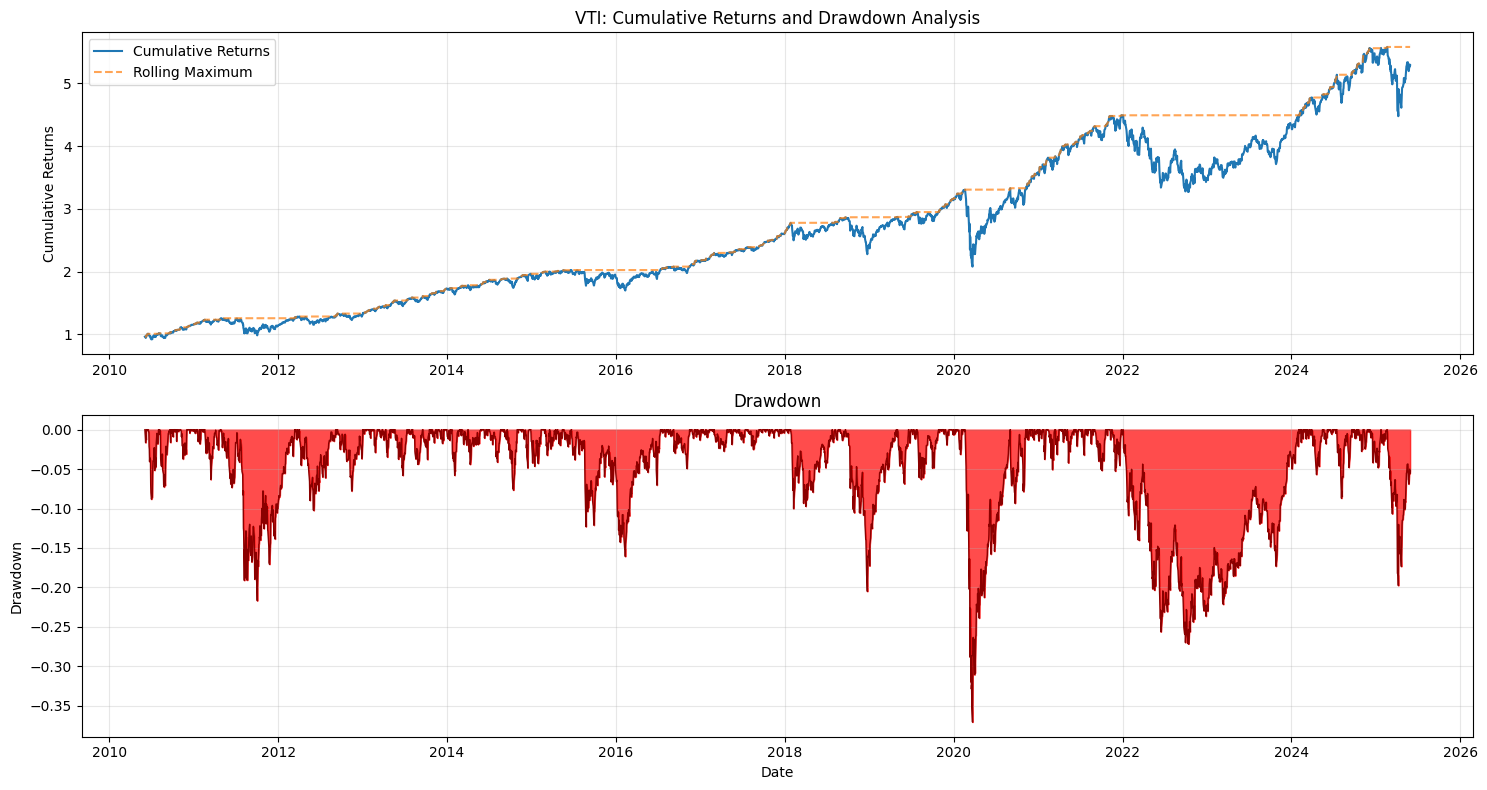

In [48]:
# ============================================================================
# STEP 9: RISK METRICS
# ============================================================================

print("\n\n9. RISK METRICS")
print("-" * 50)

def calculate_risk_metrics(returns, confidence_level=0.05):
    """Calculate various risk metrics"""
    metrics = {}
    
    for asset in returns.columns:
        asset_returns = returns[asset].dropna()
        
        # Value at Risk (VaR)
        var_5 = np.percentile(asset_returns, confidence_level * 100)
        
        # Conditional Value at Risk (CVaR)
        cvar_5 = asset_returns[asset_returns <= var_5].mean()
        
        # Maximum Drawdown
        cum_returns = (1 + asset_returns).cumprod()
        rolling_max = cum_returns.expanding().max()
        drawdowns = (cum_returns - rolling_max) / rolling_max
        max_drawdown = drawdowns.min()
        
        # Sharpe Ratio (assuming 2% risk-free rate)
        excess_returns = asset_returns - 0.02/252  # Daily risk-free rate
        sharpe_ratio = excess_returns.mean() / asset_returns.std() * np.sqrt(252)
        
        metrics[asset] = {
            'VaR_5%': var_5,
            'CVaR_5%': cvar_5,
            'Max_Drawdown': max_drawdown,
            'Sharpe_Ratio': sharpe_ratio,
            'Volatility': asset_returns.std() * np.sqrt(252)
        }
    
    return pd.DataFrame(metrics).T

risk_metrics = calculate_risk_metrics(returns)
print("Risk Metrics:")
print(risk_metrics)

# Plot drawdown analysis for VTI
vti_returns = returns['VTI']
vti_cum_returns = (1 + vti_returns).cumprod()
vti_rolling_max = vti_cum_returns.expanding().max()
vti_drawdowns = (vti_cum_returns - vti_rolling_max) / vti_rolling_max

plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
plt.plot(vti_cum_returns.index, vti_cum_returns, label='Cumulative Returns', linewidth=1.5)
plt.plot(vti_rolling_max.index, vti_rolling_max, label='Rolling Maximum', 
         linestyle='--', alpha=0.7)
plt.title('VTI: Cumulative Returns and Drawdown Analysis')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.fill_between(vti_drawdowns.index, vti_drawdowns, 0, alpha=0.7, color='red')
plt.plot(vti_drawdowns.index, vti_drawdowns, color='darkred', linewidth=1)
plt.title('Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()




10. SIMPLE FORECASTING MODELS
--------------------------------------------------
ARIMA Model Summary for VTI Returns:
                               SARIMAX Results                                
Dep. Variable:                    VTI   No. Observations:                 1000
Model:                 ARIMA(1, 0, 1)   Log Likelihood                3034.738
Date:                Fri, 30 May 2025   AIC                          -6061.475
Time:                        17:08:15   BIC                          -6041.844
Sample:                             0   HQIC                         -6054.014
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.867      0.386      -0.000       0.001
ar.L1      

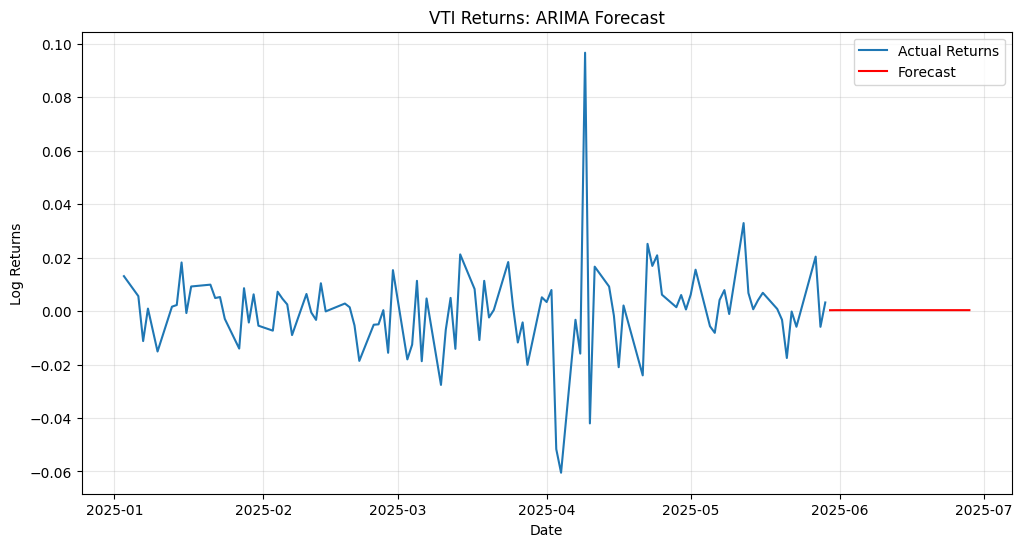

In [49]:
# ============================================================================
# STEP 10: SIMPLE FORECASTING MODELS
# ============================================================================

print("\n\n10. SIMPLE FORECASTING MODELS")
print("-" * 50)

# ARIMA model for VTI returns
try:
    from statsmodels.tsa.arima.model import ARIMA
    
    # Use last 1000 observations for modeling
    vti_returns_model = returns['VTI'].dropna()[-1000:]
    
    # Fit ARIMA(1,0,1) model
    arima_model = ARIMA(vti_returns_model, order=(1, 0, 1))
    arima_fitted = arima_model.fit()
    
    print("ARIMA Model Summary for VTI Returns:")
    print(arima_fitted.summary())
    
    # Forecast next 30 days
    forecast = arima_fitted.forecast(steps=30)
    forecast_index = pd.date_range(start=vti_returns_model.index[-1] + pd.Timedelta(days=1), 
                                   periods=30, freq='D')
    
    # Plot actual vs forecast
    plt.figure(figsize=(12, 6))
    plt.plot(vti_returns_model.index[-100:], vti_returns_model.iloc[-100:], 
             label='Actual Returns', linewidth=1.5)
    plt.plot(forecast_index, forecast, label='Forecast', linewidth=1.5, color='red')
    plt.title('VTI Returns: ARIMA Forecast')
    plt.xlabel('Date')
    plt.ylabel('Log Returns')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
except Exception as e:
    print(f"ARIMA modeling error: {e}")



11. PORTFOLIO ANALYSIS
--------------------------------------------------
Portfolio Statistics (Equal-weighted):
Annual Return: 0.1425
Annual Volatility: 0.1836
Sharpe Ratio: 0.6672
Max Drawdown: -0.3438

Comparison: Individual Assets vs Portfolio:
                 VaR_5%  CVaR_5%  Max_Drawdown  Sharpe_Ratio  Volatility
QQQ             -0.0213  -0.0320       -0.3850        0.7196      0.2087
SPY             -0.0167  -0.0269       -0.3575        0.6337      0.1739
VTI             -0.0170  -0.0274       -0.3708        0.6028      0.1778
Equal_Portfolio -0.0178  -0.0283       -0.3438        0.6672      0.1836


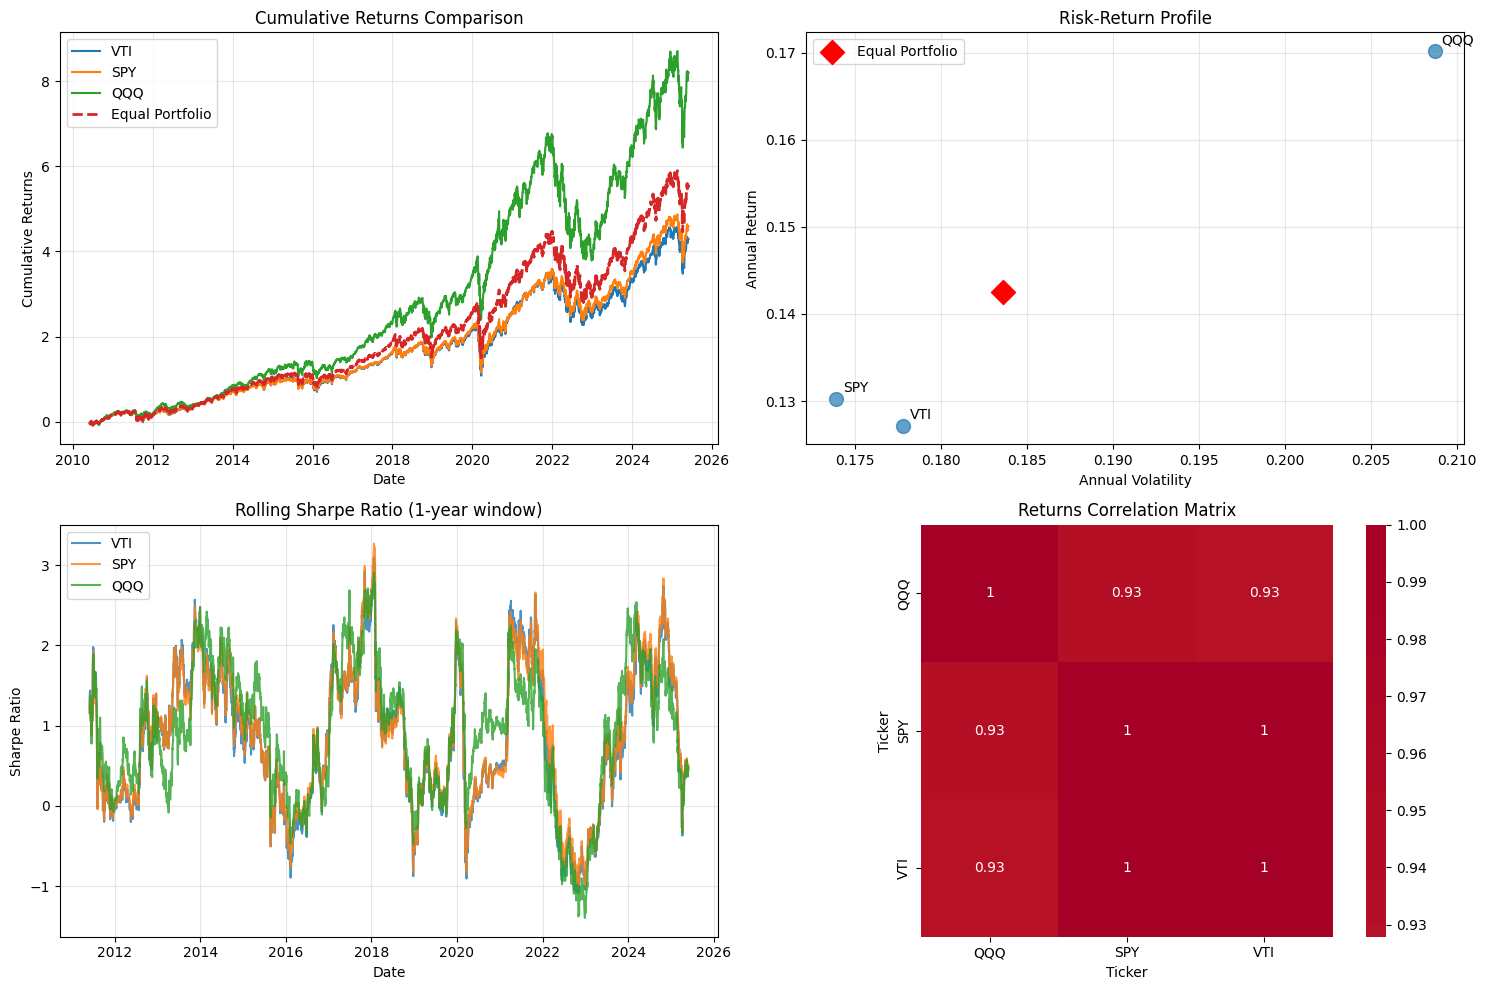


ANALYSIS COMPLETE


In [50]:
# ============================================================================
# STEP 11: PORTFOLIO ANALYSIS
# ============================================================================

print("\n\n11. PORTFOLIO ANALYSIS")
print("-" * 50)

# Equal-weighted portfolio
equal_weights = np.array([1/len(assets)] * len(assets))
portfolio_returns = (returns * equal_weights).sum(axis=1)

print("Portfolio Statistics (Equal-weighted):")
portfolio_stats = {
    'Annual Return': portfolio_returns.mean() * 252,
    'Annual Volatility': portfolio_returns.std() * np.sqrt(252),
    'Sharpe Ratio': (portfolio_returns.mean() - 0.02/252) / portfolio_returns.std() * np.sqrt(252),
    'Max Drawdown': ((1 + portfolio_returns).cumprod() / (1 + portfolio_returns).cumprod().expanding().max() - 1).min()
}

for metric, value in portfolio_stats.items():
    print(f"{metric}: {value:.4f}")

# Compare individual assets vs portfolio
comparison_stats = risk_metrics.copy()
comparison_stats.loc['Equal_Portfolio'] = [
    np.percentile(portfolio_returns, 5),  # VaR
    portfolio_returns[portfolio_returns <= np.percentile(portfolio_returns, 5)].mean(),  # CVaR
    portfolio_stats['Max Drawdown'],
    portfolio_stats['Sharpe Ratio'],
    portfolio_stats['Annual Volatility']
]

print("\nComparison: Individual Assets vs Portfolio:")
print(comparison_stats.round(4))

# Plot portfolio performance
plt.figure(figsize=(15, 10))

# Cumulative returns comparison
plt.subplot(2, 2, 1)
for asset in assets:
    cum_ret = (1 + returns[asset]).cumprod() - 1
    plt.plot(cum_ret.index, cum_ret, label=asset, linewidth=1.5)

portfolio_cum_ret = (1 + portfolio_returns).cumprod() - 1
plt.plot(portfolio_cum_ret.index, portfolio_cum_ret, label='Equal Portfolio', 
         linewidth=2, linestyle='--')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True, alpha=0.3)

# Risk-Return scatter
plt.subplot(2, 2, 2)
annual_returns = returns.mean() * 252
annual_volatility = returns.std() * np.sqrt(252)

plt.scatter(annual_volatility, annual_returns, s=100, alpha=0.7)
for i, asset in enumerate(assets):
    plt.annotate(asset, (annual_volatility[asset], annual_returns[asset]), 
                xytext=(5, 5), textcoords='offset points')

# Add portfolio point
portfolio_annual_return = portfolio_returns.mean() * 252
portfolio_annual_vol = portfolio_returns.std() * np.sqrt(252)
plt.scatter(portfolio_annual_vol, portfolio_annual_return, s=150, color='red', 
           marker='D', label='Equal Portfolio')

plt.title('Risk-Return Profile')
plt.xlabel('Annual Volatility')
plt.ylabel('Annual Return')
plt.legend()
plt.grid(True, alpha=0.3)

# Rolling Sharpe ratio
plt.subplot(2, 2, 3)
rolling_sharpe = {}
for asset in assets:
    excess_ret = returns[asset] - 0.02/252
    rolling_sharpe[asset] = (excess_ret.rolling(window=252).mean() / 
                            returns[asset].rolling(window=252).std() * np.sqrt(252))
    plt.plot(rolling_sharpe[asset].index, rolling_sharpe[asset], label=asset, alpha=0.8)

plt.title('Rolling Sharpe Ratio (1-year window)')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.grid(True, alpha=0.3)

# Correlation heatmap
plt.subplot(2, 2, 4)
sns.heatmap(returns.corr(), annot=True, cmap='RdYlBu_r', center=0, square=True)
plt.title('Returns Correlation Matrix')

plt.tight_layout()
plt.show()


COMPREHENSIVE FINANCIAL TIME SERIES ANALYSIS

POSSIBLE TIME SERIES ANALYSES FOR FINANCIAL STOCKS:

1. DATA PREPARATION & EXPLORATION
   - Data download and cleaning
   - Missing data handling
   - Outlier detection
   - Basic statistics and visualization

2. PRICE ANALYSIS
   - Price movements and trends
   - Log returns calculation
   - Cumulative returns
   - Drawdown analysis

3. VOLATILITY ANALYSIS
   - Rolling volatility
   - GARCH models for volatility clustering
   - Volatility forecasting
   - Risk metrics (VaR, CVaR)

4. STATIONARITY TESTING
   - Augmented Dickey-Fuller test
   - KPSS test
   - Phillips-Perron test

5. CORRELATION & COINTEGRATION
   - Rolling correlations
   - Cointegration testing
   - Pairs trading analysis

6. TECHNICAL INDICATORS
   - Moving averages
   - RSI, MACD, Bollinger Bands
   - Support/Resistance levels

7. SEASONAL PATTERNS
   - Seasonal decomposition
   - Calendar effects
   - Day-of-week effects

8. FORECASTING MODELS
   - ARIMA models
   - Vec

[*********************100%***********************]  3 of 3 completed


Data shape: (3771, 3)
Date range: 2010-06-03 00:00:00 to 2025-05-29 00:00:00

First 5 rows:
Ticker            QQQ        SPY        VTI
Date                                       
2010-06-03  40.764774  84.130653  43.270866
2010-06-04  39.367813  81.174561  41.751102
2010-06-07  38.651882  80.163887  41.071434
2010-06-08  38.582039  81.022598  41.422729
2010-06-09  38.259003  80.589439  41.231823

Missing data check:
Ticker
QQQ    0
SPY    0
VTI    0
dtype: int64


2. BASIC STATISTICS AND VISUALIZATION
--------------------------------------------------
Basic Statistics:
Ticker          QQQ          SPY          VTI
count   3771.000000  3771.000000  3771.000000
mean     190.960763   261.143376   132.457123
std      135.770432   139.957947    68.983350
min       37.223648    78.033249    39.965397
25%       79.945004   151.893852    79.370090
50%      146.233765   228.154755   116.796150
75%      299.606003   379.593735   191.593964
max      538.716675   611.091675   302.058075


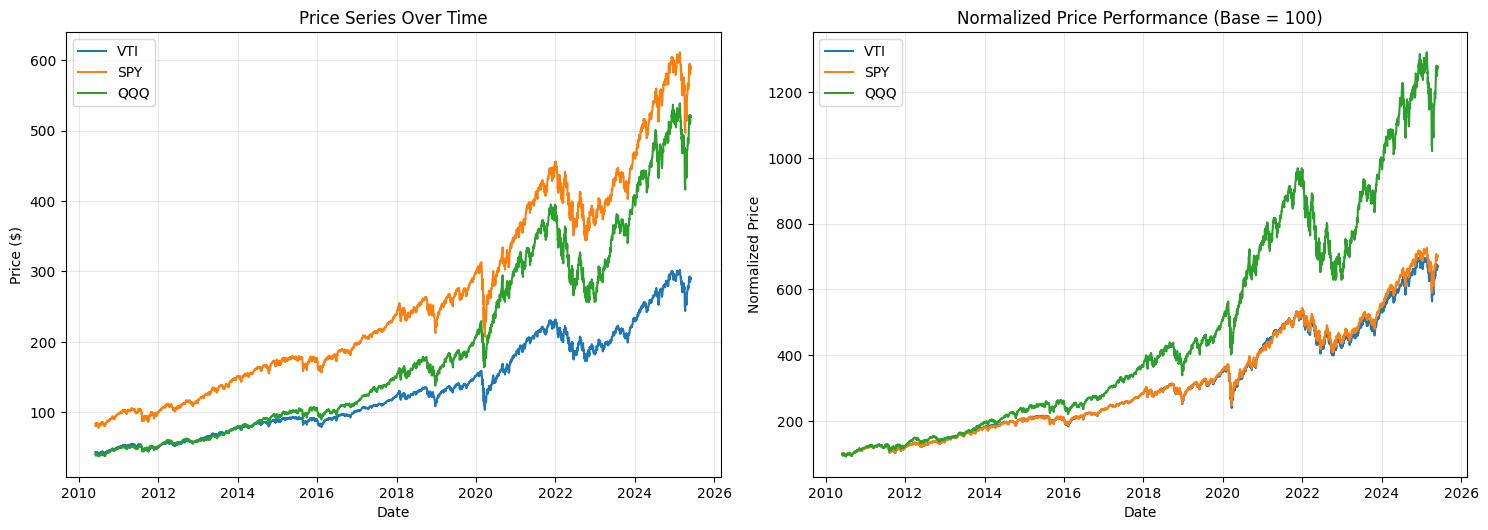



3. RETURNS ANALYSIS
--------------------------------------------------
Returns Statistics:
Ticker          QQQ          SPY          VTI
count   3770.000000  3770.000000  3770.000000
mean       0.000675     0.000517     0.000505
std        0.013146     0.010955     0.011201
min       -0.127593    -0.115887    -0.120822
25%       -0.004757    -0.003717    -0.003960
50%        0.001161     0.000673     0.000764
75%        0.007369     0.005781     0.005892
max        0.113356     0.099863     0.096633



Cumulative Returns (Final):
VTI: 428.47%
SPY: 458.60%
QQQ: 819.23%


4. VOLATILITY ANALYSIS
--------------------------------------------------
Average Annualized Volatility:
VTI: 15.29%
SPY: 14.95%
QQQ: 18.63%



GARCH Model Analysis for VTI:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    VTI   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4942.35
Distribution:                  Normal   AIC:                           9892.70
Method:            Maximum Likelihood   BIC:                           9917.63
                                        No. Observations:                 3770
Date:                Fri, May 30 2025   Df Residuals:                     3769
Time:                        17:13:06   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0832  1.256e-02 

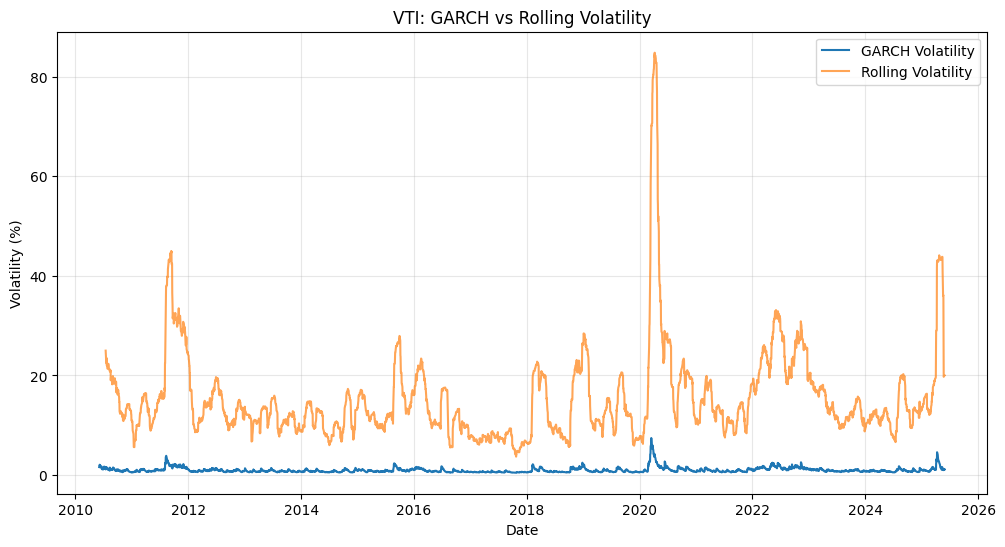



5. STATIONARITY TESTING
--------------------------------------------------

Stationarity Tests for VTI Prices:
ADF Test - p-value: 0.9912
ADF: Series is non-stationary (fail to reject null hypothesis)
KPSS Test - p-value: 0.0100
KPSS: Series is non-stationary (reject null hypothesis)

Stationarity Tests for SPY Prices:
ADF Test - p-value: 0.9949
ADF: Series is non-stationary (fail to reject null hypothesis)
KPSS Test - p-value: 0.0100
KPSS: Series is non-stationary (reject null hypothesis)

Stationarity Tests for QQQ Prices:
ADF Test - p-value: 0.9957
ADF: Series is non-stationary (fail to reject null hypothesis)
KPSS Test - p-value: 0.0100
KPSS: Series is non-stationary (reject null hypothesis)

Stationarity Tests for VTI Returns:
ADF Test - p-value: 0.0000
ADF: Series is stationary (reject null hypothesis)
KPSS Test - p-value: 0.1000
KPSS: Series is stationary (fail to reject null hypothesis)

Stationarity Tests for SPY Returns:
ADF Test - p-value: 0.0000
ADF: Series is stationary 

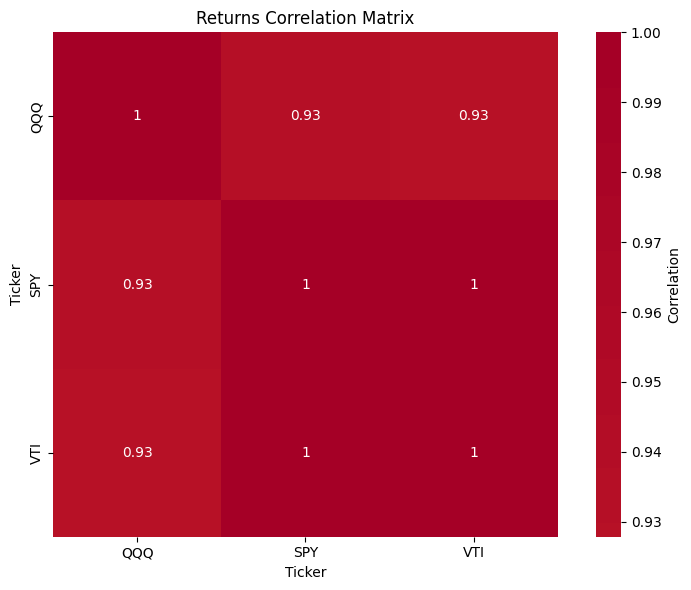

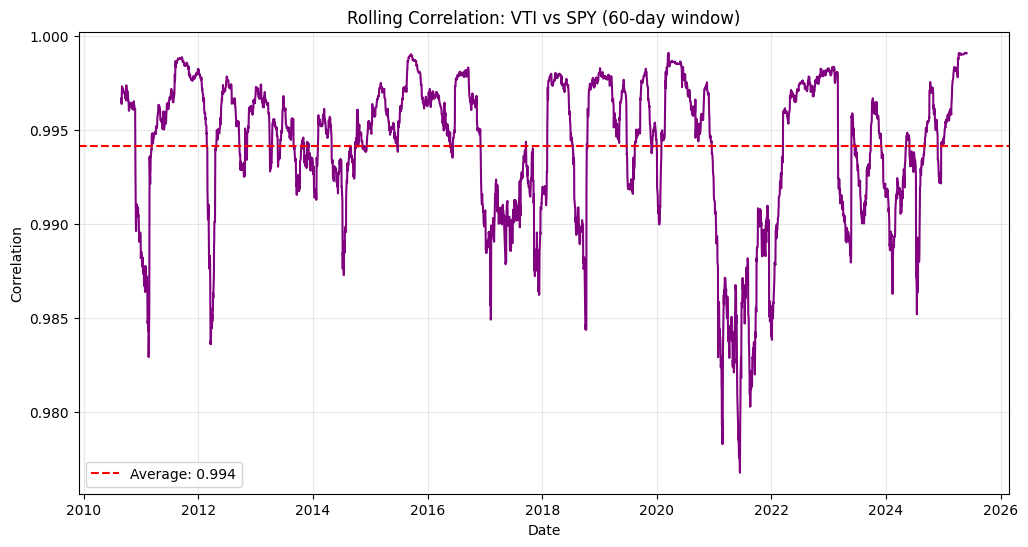


Cointegration Tests:
VTI vs SPY: p-value = 0.6541
  -> VTI and SPY are not cointegrated
VTI vs QQQ: p-value = 0.2554
  -> VTI and QQQ are not cointegrated
SPY vs QQQ: p-value = 0.2480
  -> SPY and QQQ are not cointegrated


7. TECHNICAL INDICATORS
--------------------------------------------------


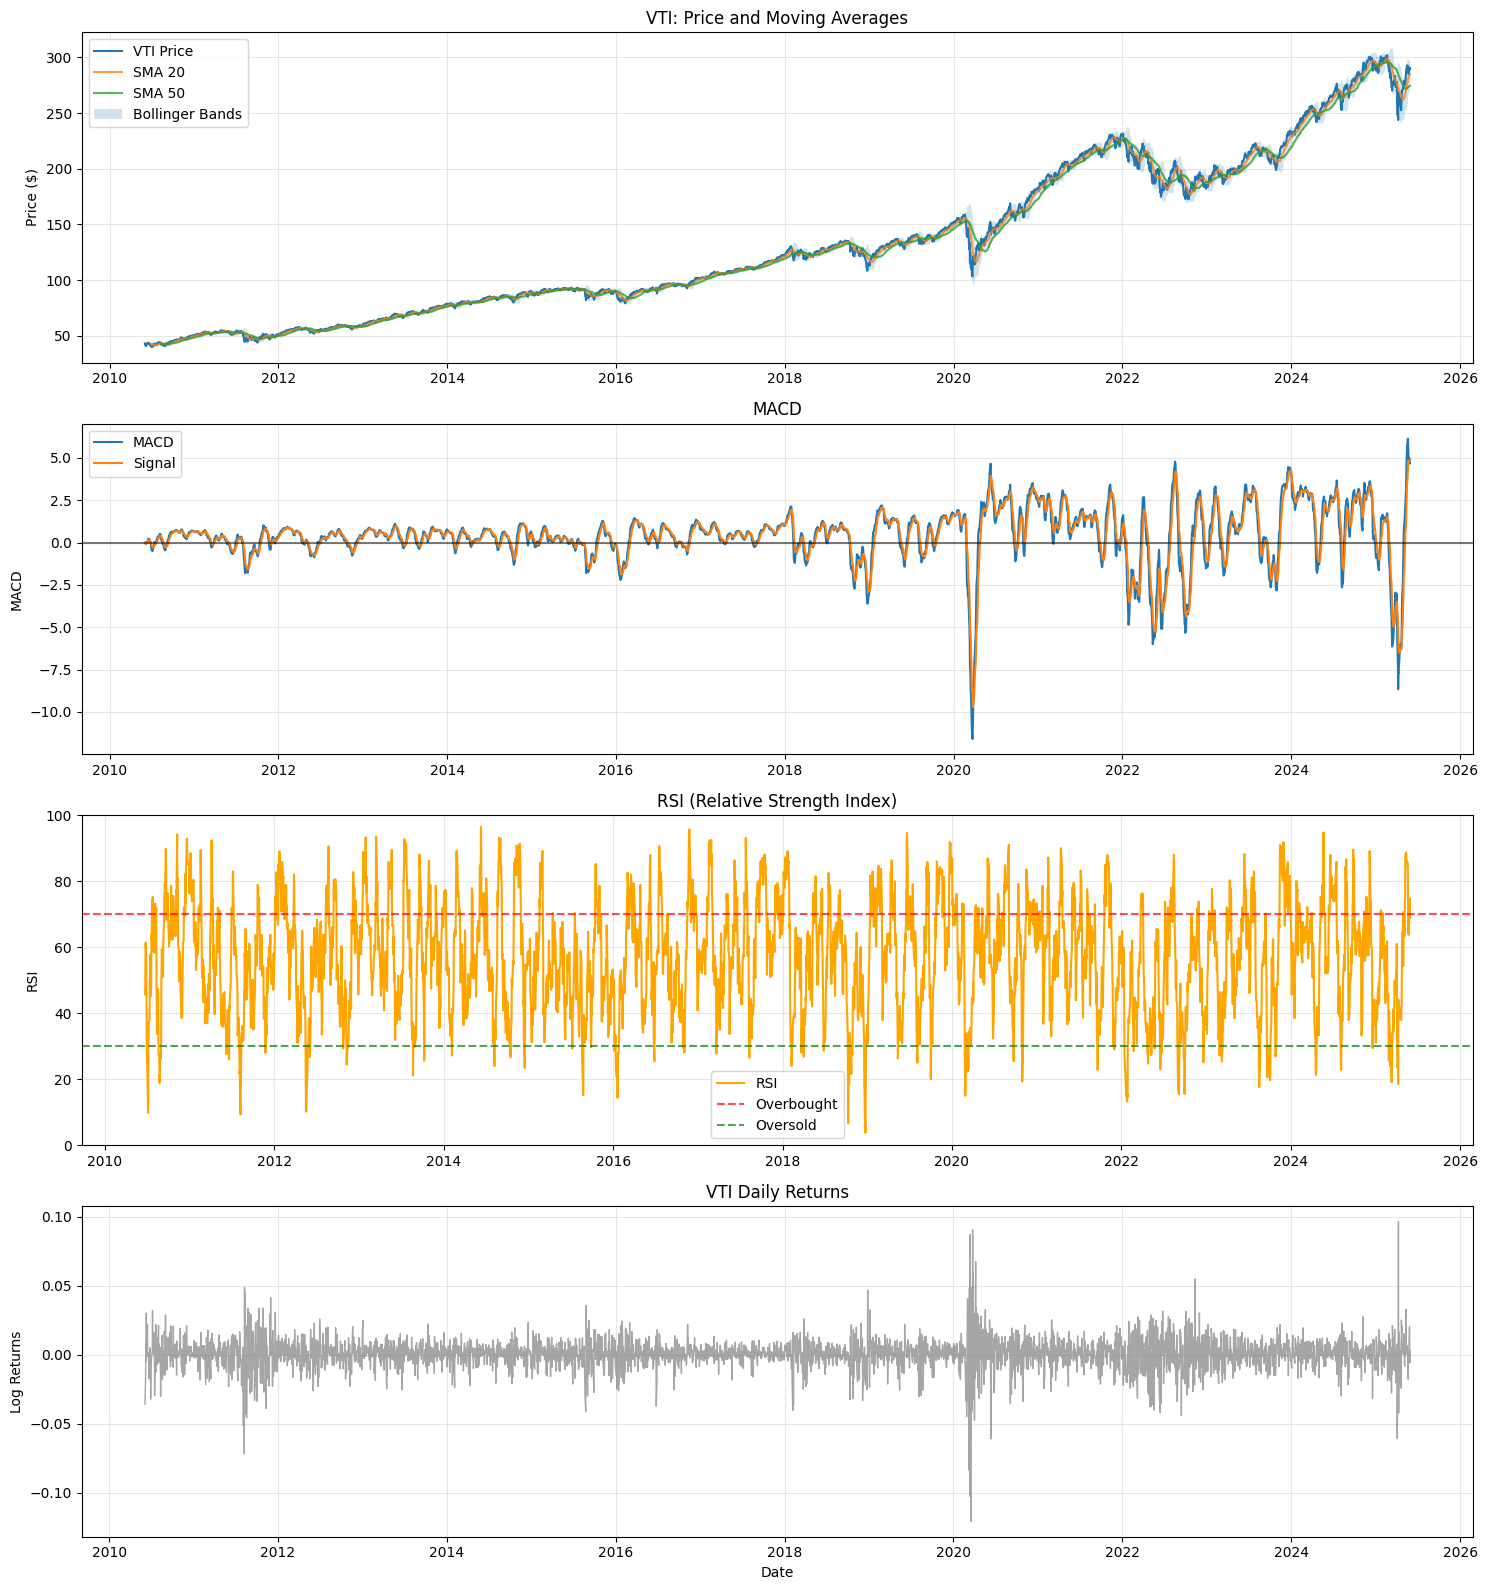



8. SEASONAL DECOMPOSITION
--------------------------------------------------
Monthly Returns Statistics:
Ticker         QQQ         SPY         VTI
count   180.000000  180.000000  180.000000
mean      0.014144    0.010821    0.010571
std       0.050001    0.041716    0.043209
min      -0.146133   -0.133384   -0.149495
25%      -0.016014   -0.013458   -0.015257
50%       0.019283    0.017224    0.016397
75%       0.047990    0.036377    0.036526
max       0.139534    0.119545    0.123396


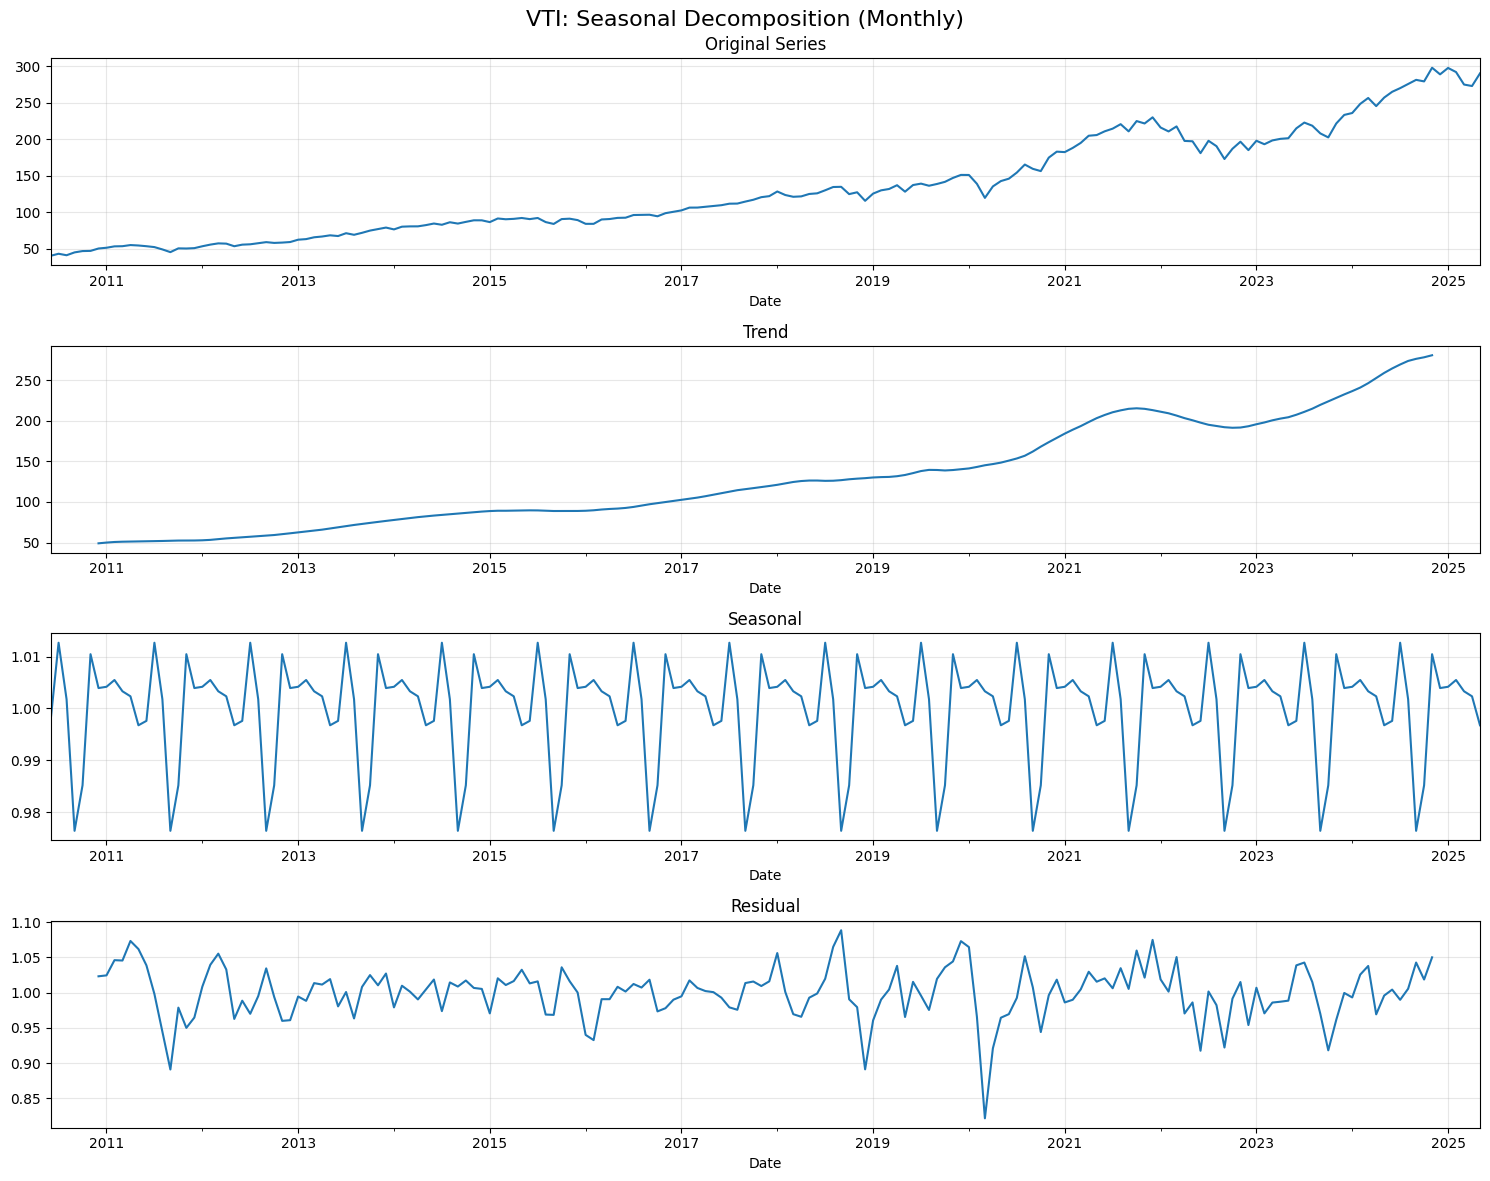


Day of Week Effect (Average Returns):
Ticker          VTI       SPY       QQQ
Monday     0.000088  0.000182  0.000601
Tuesday    0.000855  0.000839  0.001253
Wednesday  0.000606  0.000650  0.000992
Thursday   0.000373  0.000375  0.000320
Friday     0.000563  0.000505  0.000187


9. RISK METRICS
--------------------------------------------------
Risk Metrics:
       VaR_5%   CVaR_5%  Max_Drawdown  Sharpe_Ratio  Volatility
QQQ -0.021261 -0.032007     -0.385020      0.719623    0.208686
SPY -0.016668 -0.026903     -0.357459      0.633692    0.173902
VTI -0.017010 -0.027446     -0.370847      0.602816    0.177817


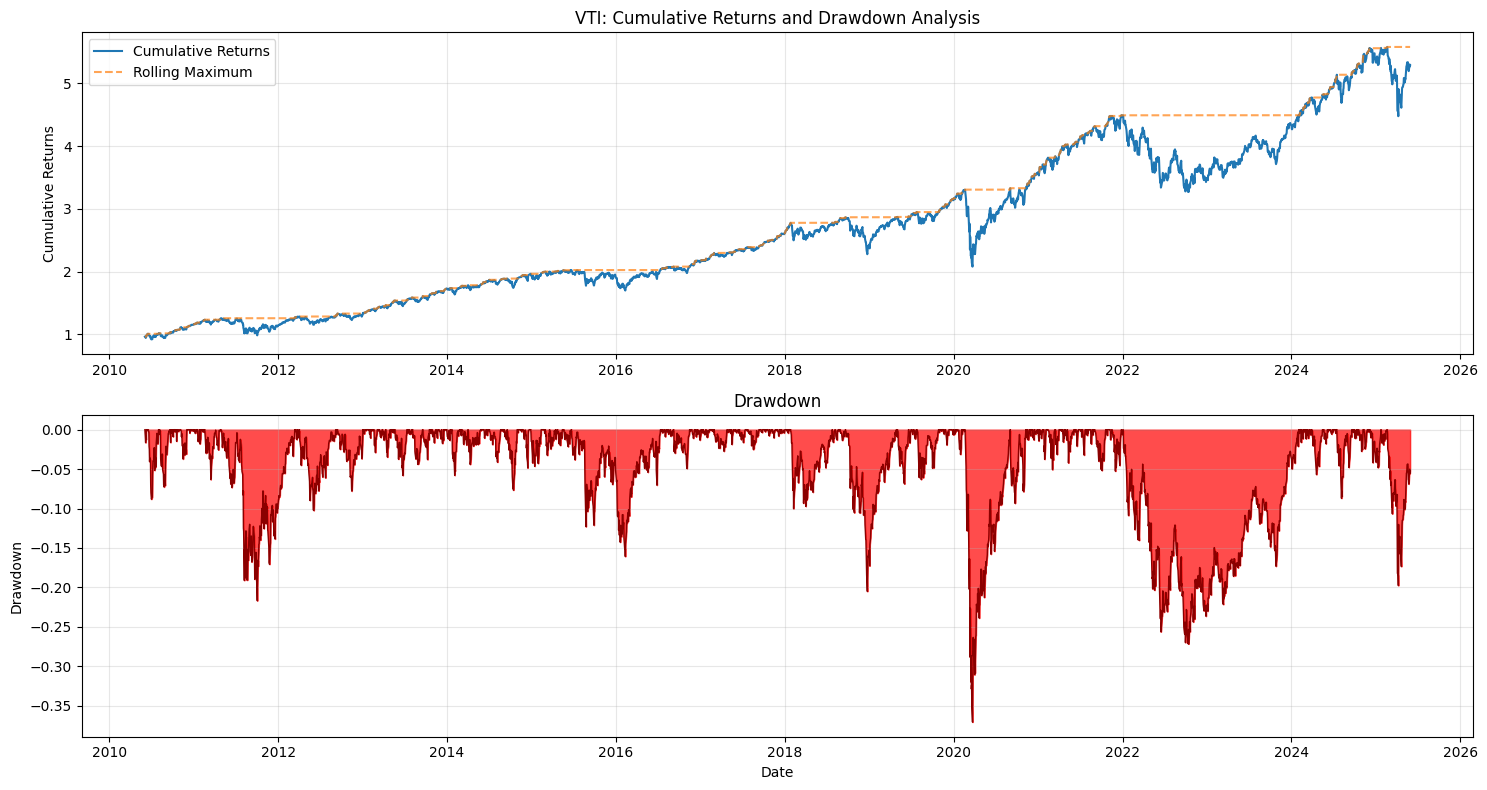



10. ADVANCED FORECASTING MODELS
--------------------------------------------------
Model Comparison for VTI Returns Forecasting:

1. AUTO ARIMA MODEL
------------------------------
Best ARIMA order: (0, 0, 0)
AIC: -6065.2623

2. VECTOR AUTOREGRESSION (VAR) MODEL
----------------------------------------
Optimal VAR lag order: 1
VAR Model Summary:
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 30, May, 2025
Time:                     17:13:27
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -34.1642
Nobs:                     499.000    HQIC:                  -34.2257
Log likelihood:           6437.08    FPE:                1.31430e-15
AIC:                     -34.2655    Det(Omega_mle):     1.28319e-15
--------------------------------------------------------------------
Results for equation VTI
            coefficient       std. e

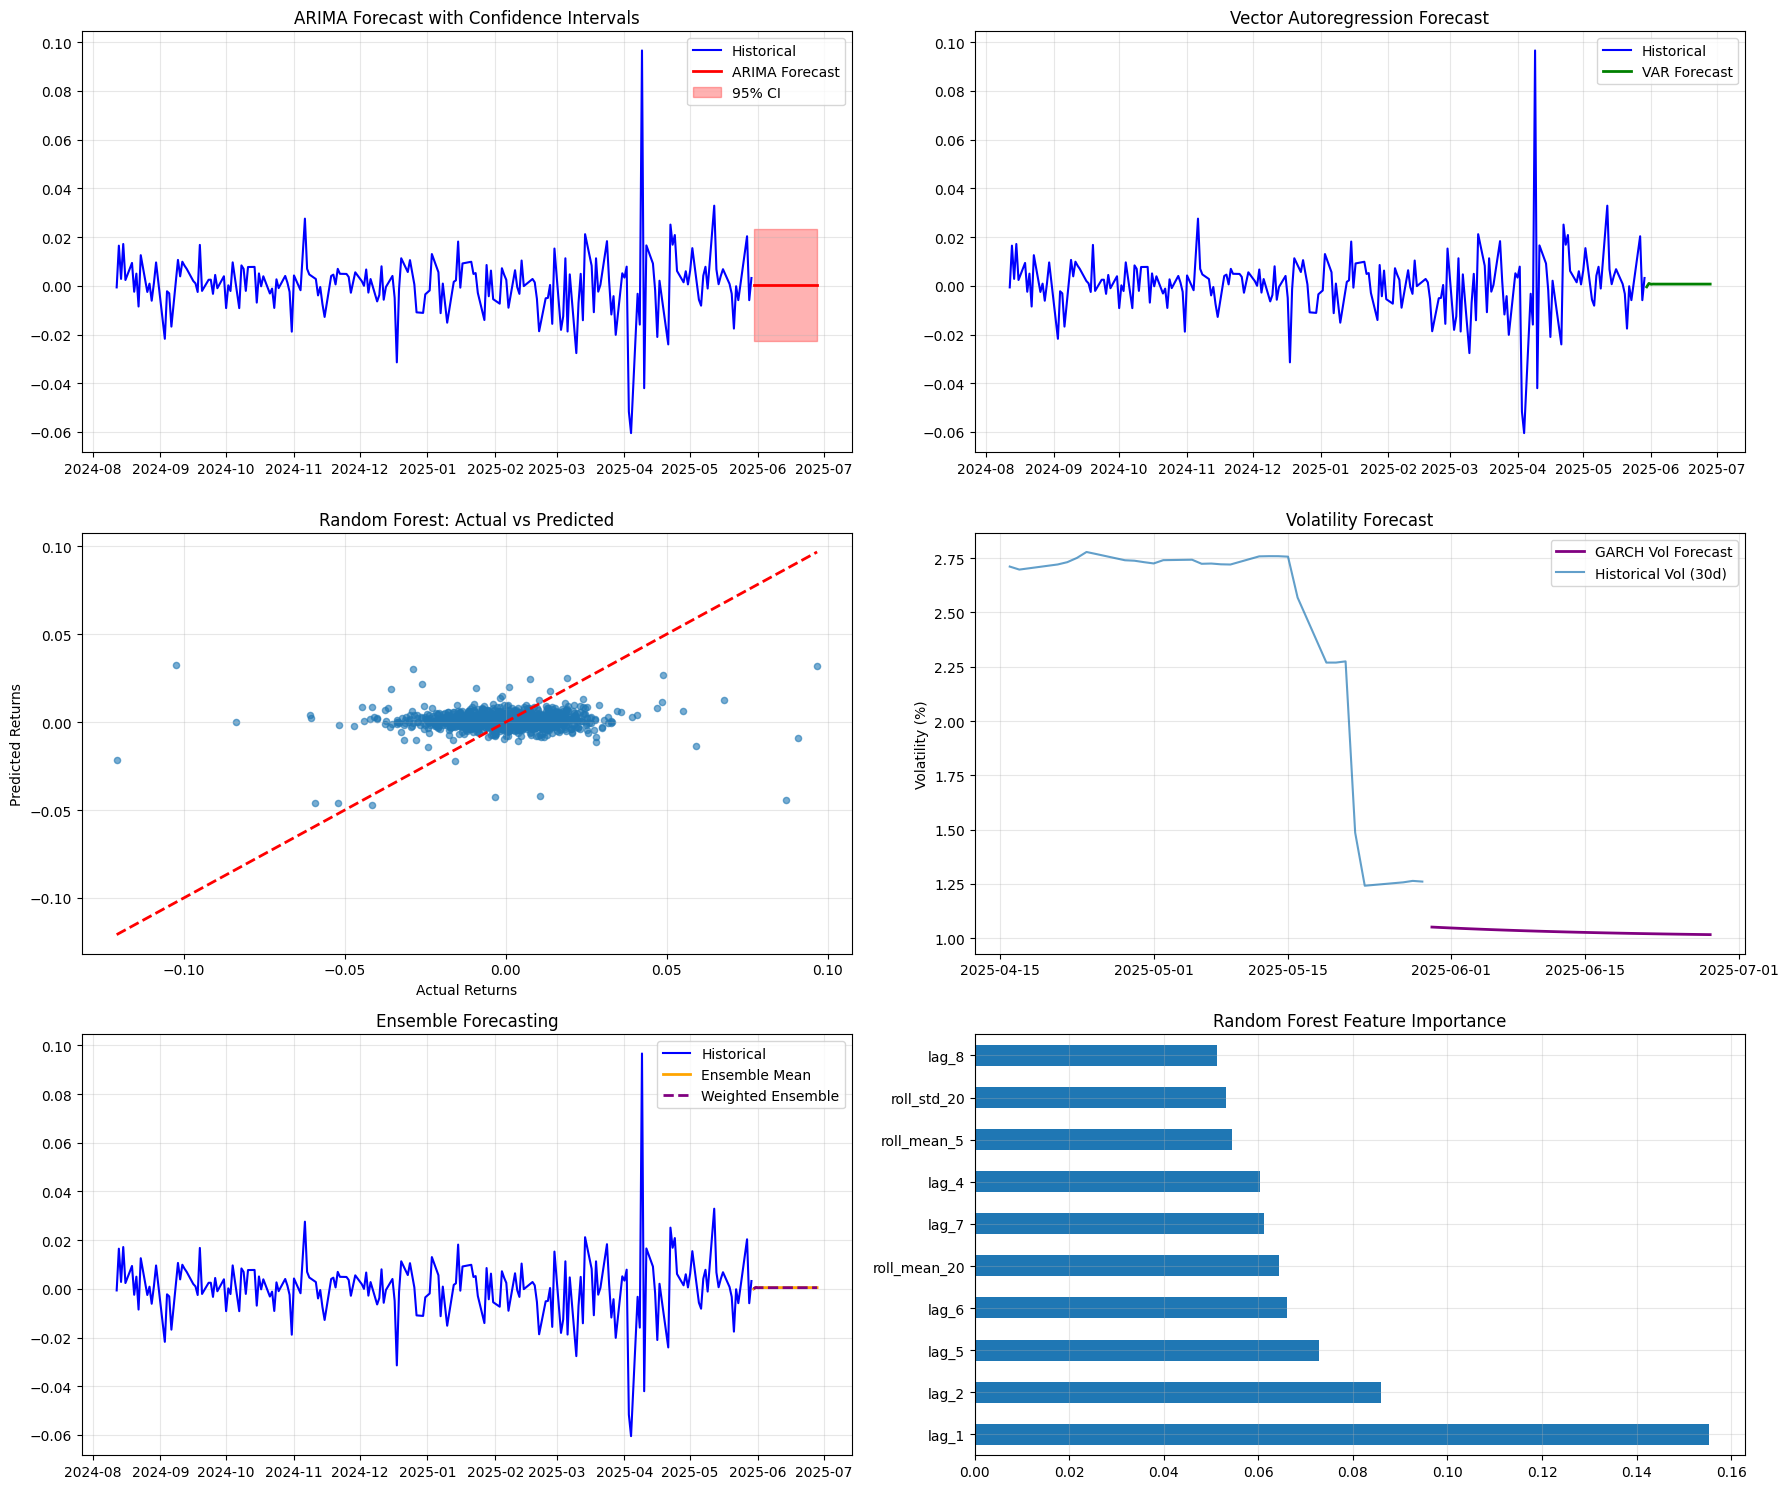


7. FORECAST EVALUATION
------------------------------
Walk-Forward Validation Results:
(Using last 200 observations with 100-day rolling window)

Model Performance Comparison:
            MSE       MAE  Direction_Accuracy      RMSE
Naive  0.000674  0.016723            0.474747  0.025953
Mean   0.000303  0.010995            0.454545  0.017405
ARIMA  0.000303  0.010995            0.454545  0.017405

Best model by RMSE: Mean
Direction accuracy of best model: 45.5%

FORECASTING RECOMMENDATIONS:

1. ENSEMBLE APPROACH: Combine multiple models for better robustness
2. CONFIDENCE INTERVALS: Always include uncertainty measures
3. VOLATILITY CLUSTERING: Use GARCH for risk management
4. FEATURE ENGINEERING: Technical indicators improve ML performance
5. REGULAR RETRAINING: Update models as new data becomes available
6. DIRECTION VS MAGNITUDE: Focus on direction for trading signals
7. WALK-FORWARD VALIDATION: Essential for realistic performance assessment

Key Insights:
- Financial returns are no

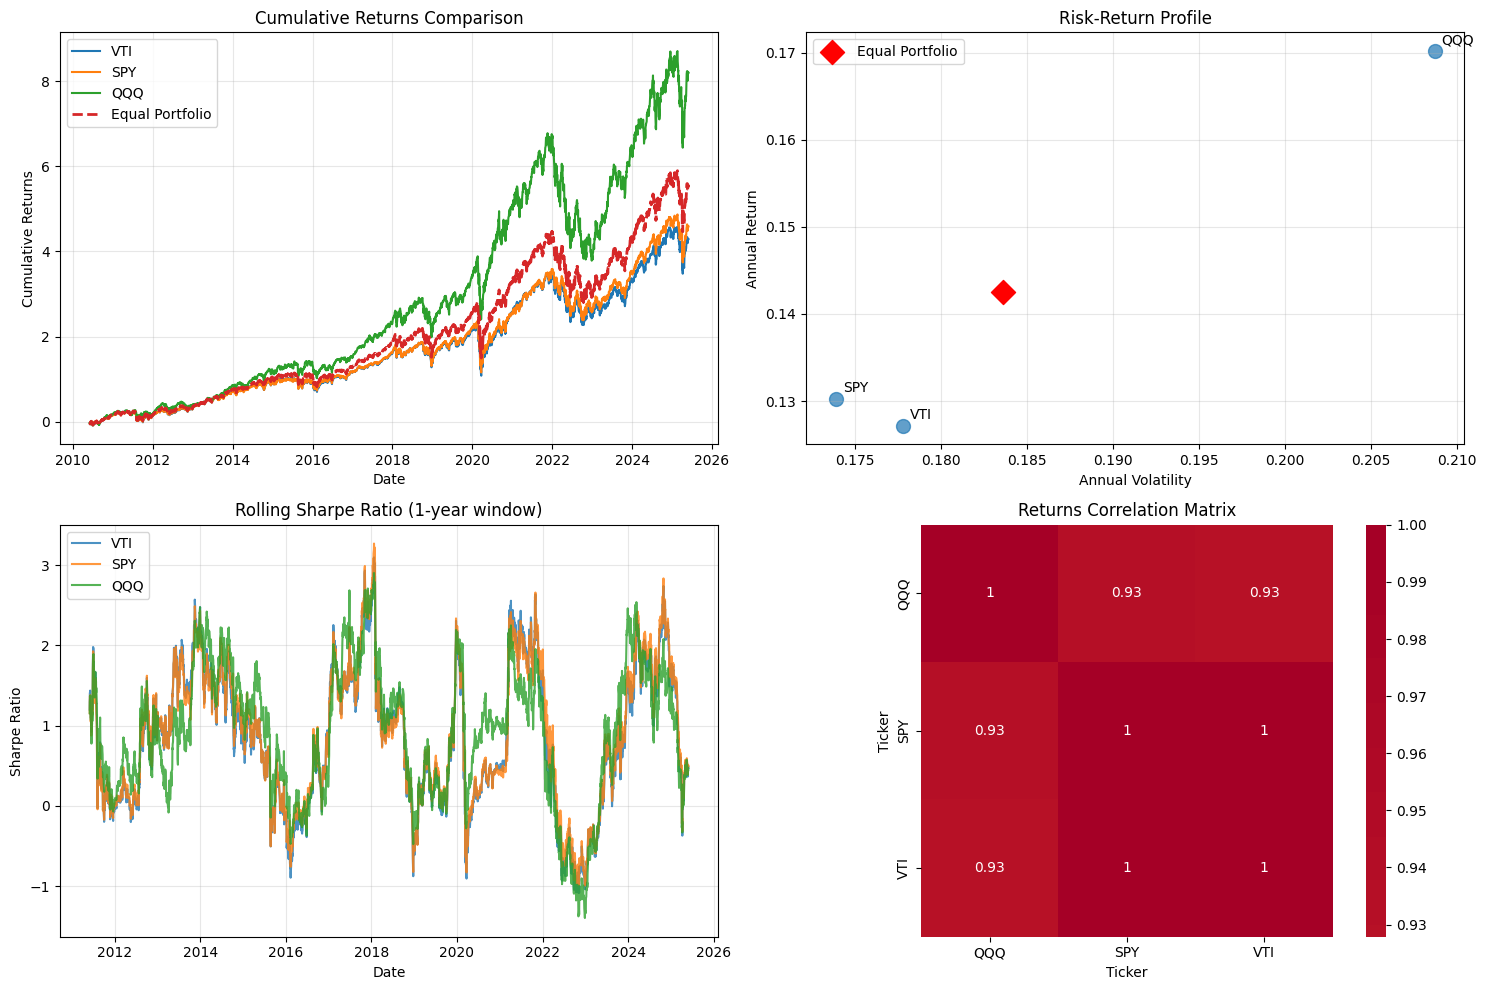


ANALYSIS COMPLETE

SUMMARY OF ANALYSES PERFORMED:

✓ Data extraction and preparation
✓ Basic statistics and visualization  
✓ Returns analysis (log returns, distributions)
✓ Volatility analysis (rolling volatility, GARCH modeling)
✓ Stationarity testing (ADF, KPSS tests)
✓ Correlation and cointegration analysis
✓ Technical indicators (MA, MACD, RSI, Bollinger Bands)
✓ Seasonal decomposition and calendar effects
✓ Risk metrics (VaR, CVaR, Sharpe ratio, max drawdown)
✓ Simple forecasting (ARIMA model)
✓ Portfolio analysis and optimization

This comprehensive analysis provides insights into:
- Price movements and trends
- Risk characteristics of each asset
- Relationships between assets
- Potential trading signals
- Portfolio diversification benefits
- Forecasting capabilities

Next steps could include:
- More sophisticated forecasting models (LSTM, Prophet)
- Portfolio optimization with constraints
- Factor analysis and risk attribution
- Event studies and regime analysis
- High-frequen

In [51]:
# Complete Financial Time Series Analysis Guide
# This comprehensive guide covers all major time series analysis techniques for financial data

import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Statistical and econometric libraries
from statsmodels.tsa.stattools import adfuller, coint, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

print("="*80)
print("COMPREHENSIVE FINANCIAL TIME SERIES ANALYSIS")
print("="*80)

# ============================================================================
# POSSIBLE TIME SERIES ANALYSES FOR FINANCIAL DATA
# ============================================================================

analyses_list = """
POSSIBLE TIME SERIES ANALYSES FOR FINANCIAL STOCKS:

1. DATA PREPARATION & EXPLORATION
   - Data download and cleaning
   - Missing data handling
   - Outlier detection
   - Basic statistics and visualization

2. PRICE ANALYSIS
   - Price movements and trends
   - Log returns calculation
   - Cumulative returns
   - Drawdown analysis

3. VOLATILITY ANALYSIS
   - Rolling volatility
   - GARCH models for volatility clustering
   - Volatility forecasting
   - Risk metrics (VaR, CVaR)

4. STATIONARITY TESTING
   - Augmented Dickey-Fuller test
   - KPSS test
   - Phillips-Perron test

5. CORRELATION & COINTEGRATION
   - Rolling correlations
   - Cointegration testing
   - Pairs trading analysis

6. TECHNICAL INDICATORS
   - Moving averages
   - RSI, MACD, Bollinger Bands
   - Support/Resistance levels

7. SEASONAL PATTERNS
   - Seasonal decomposition
   - Calendar effects
   - Day-of-week effects

8. FORECASTING MODELS
   - ARIMA models
   - Vector Autoregression (VAR)
   - Exponential smoothing

9. PORTFOLIO ANALYSIS
   - Portfolio optimization
   - Risk-return analysis
   - Sharpe ratio calculation

10. REGIME ANALYSIS
    - Market regime identification
    - Structural breaks detection

11. PERFORMANCE METRICS
    - Alpha, Beta calculation
    - Information ratio
    - Maximum drawdown
"""

print(analyses_list)
print("\n" + "="*80)
print("IMPLEMENTATION BEGINS")
print("="*80)

# ============================================================================
# STEP 1: DATA EXTRACTION AND PREPARATION
# ============================================================================

print("\n1. DATA EXTRACTION AND PREPARATION")
print("-" * 50)

# Download data
years = 15
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)
assets = ["VTI", "SPY", "QQQ"]

print(f"Downloading data for {assets}")
print(f"Period: {startDate.strftime('%Y-%m-%d')} to {endDate.strftime('%Y-%m-%d')}")

# Download adjusted close prices
df = yf.download(assets, start=startDate, end=endDate, auto_adjust=False)["Adj Close"]

print(f"Data shape: {df.shape}")
print(f"Date range: {df.index[0]} to {df.index[-1]}")
print("\nFirst 5 rows:")
print(df.head())

# Check for missing data
print("\nMissing data check:")
print(df.isnull().sum())

# Fill any missing data with forward fill
df = df.fillna(method='ffill').dropna()

# ============================================================================
# STEP 2: BASIC STATISTICS AND VISUALIZATION
# ============================================================================

print("\n\n2. BASIC STATISTICS AND VISUALIZATION")
print("-" * 50)

# Basic statistics
print("Basic Statistics:")
print(df.describe())

# Plot price series
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
for asset in assets:
    plt.plot(df.index, df[asset], label=asset, linewidth=1.5)
plt.title('Price Series Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)

# Normalized prices (starting at 100)
normalized_prices = df.div(df.iloc[0]) * 100

plt.subplot(2, 2, 2)
for asset in assets:
    plt.plot(normalized_prices.index, normalized_prices[asset], label=asset, linewidth=1.5)
plt.title('Normalized Price Performance (Base = 100)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# STEP 3: RETURNS ANALYSIS
# ============================================================================

print("\n\n3. RETURNS ANALYSIS")
print("-" * 50)

# Calculate log returns
returns = np.log(df / df.shift(1)).dropna()

print("Returns Statistics:")
print(returns.describe())

# Plot returns
plt.figure(figsize=(15, 12))

for i, asset in enumerate(assets, 1):
    plt.subplot(3, 2, 2*i-1)
    plt.plot(returns.index, returns[asset], alpha=0.7, linewidth=0.8)
    plt.title(f'{asset} Daily Returns')
    plt.xlabel('Date')
    plt.ylabel('Log Returns')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(3, 2, 2*i)
    plt.hist(returns[asset], bins=50, alpha=0.7, density=True)
    plt.title(f'{asset} Returns Distribution')
    plt.xlabel('Log Returns')
    plt.ylabel('Density')
    # Add normal distribution overlay
    mu, sigma = returns[asset].mean(), returns[asset].std()
    x = np.linspace(returns[asset].min(), returns[asset].max(), 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate cumulative returns
cumulative_returns = (1 + returns).cumprod() - 1

print("\nCumulative Returns (Final):")
for asset in assets:
    final_return = cumulative_returns[asset].iloc[-1]
    print(f"{asset}: {final_return:.2%}")

# ============================================================================
# STEP 4: VOLATILITY ANALYSIS
# ============================================================================

print("\n\n4. VOLATILITY ANALYSIS")
print("-" * 50)

# Calculate rolling volatility (30-day)
rolling_vol = returns.rolling(window=30).std() * np.sqrt(252)  # Annualized

print("Average Annualized Volatility:")
for asset in assets:
    avg_vol = rolling_vol[asset].mean()
    print(f"{asset}: {avg_vol:.2%}")

# Plot rolling volatility
plt.figure(figsize=(15, 8))
for asset in assets:
    plt.plot(rolling_vol.index, rolling_vol[asset], label=f'{asset} (30-day)', linewidth=1.5)
plt.title('Rolling Volatility (30-day, Annualized)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# GARCH Model for VTI
print("\nGARCH Model Analysis for VTI:")
try:
    # Fit GARCH(1,1) model
    garch_model = arch_model(returns['VTI'] * 100, vol='Garch', p=1, q=1)
    garch_fitted = garch_model.fit(disp='off')
    print(garch_fitted.summary())
    
    # Plot conditional volatility
    plt.figure(figsize=(12, 6))
    plt.plot(returns.index, garch_fitted.conditional_volatility, label='GARCH Volatility')
    plt.plot(rolling_vol.index, rolling_vol['VTI'] * 100, label='Rolling Volatility', alpha=0.7)
    plt.title('VTI: GARCH vs Rolling Volatility')
    plt.xlabel('Date')
    plt.ylabel('Volatility (%)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
except Exception as e:
    print(f"GARCH model error: {e}")

# ============================================================================
# STEP 5: STATIONARITY TESTING
# ============================================================================

print("\n\n5. STATIONARITY TESTING")
print("-" * 50)

def stationarity_tests(series, name):
    """Perform ADF and KPSS tests for stationarity"""
    print(f"\nStationarity Tests for {name}:")
    
    # Augmented Dickey-Fuller test
    adf_result = adfuller(series.dropna())
    print(f"ADF Test - p-value: {adf_result[1]:.4f}")
    if adf_result[1] <= 0.05:
        print("ADF: Series is stationary (reject null hypothesis)")
    else:
        print("ADF: Series is non-stationary (fail to reject null hypothesis)")
    
    # KPSS test
    try:
        kpss_result = kpss(series.dropna())
        print(f"KPSS Test - p-value: {kpss_result[1]:.4f}")
        if kpss_result[1] >= 0.05:
            print("KPSS: Series is stationary (fail to reject null hypothesis)")
        else:
            print("KPSS: Series is non-stationary (reject null hypothesis)")
    except Exception as e:
        print(f"KPSS test error: {e}")

# Test prices (should be non-stationary)
for asset in assets:
    stationarity_tests(df[asset], f"{asset} Prices")

# Test returns (should be stationary)
for asset in assets:
    stationarity_tests(returns[asset], f"{asset} Returns")

# ============================================================================
# STEP 6: CORRELATION AND COINTEGRATION ANALYSIS
# ============================================================================

print("\n\n6. CORRELATION AND COINTEGRATION ANALYSIS")
print("-" * 50)

# Static correlation matrix
print("Static Correlation Matrix (Returns):")
correlation_matrix = returns.corr()
print(correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            square=True, cbar_kws={'label': 'Correlation'})
plt.title('Returns Correlation Matrix')
plt.tight_layout()
plt.show()

# Rolling correlation (VTI vs SPY)
rolling_corr = returns['VTI'].rolling(window=60).corr(returns['SPY'])

plt.figure(figsize=(12, 6))
plt.plot(rolling_corr.index, rolling_corr, linewidth=1.5, color='purple')
plt.title('Rolling Correlation: VTI vs SPY (60-day window)')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.axhline(y=rolling_corr.mean(), color='red', linestyle='--', 
            label=f'Average: {rolling_corr.mean():.3f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Cointegration testing
print("\nCointegration Tests:")
for i in range(len(assets)):
    for j in range(i+1, len(assets)):
        asset1, asset2 = assets[i], assets[j]
        try:
            coint_result = coint(df[asset1], df[asset2])
            print(f"{asset1} vs {asset2}: p-value = {coint_result[1]:.4f}")
            if coint_result[1] <= 0.05:
                print(f"  -> {asset1} and {asset2} are cointegrated")
            else:
                print(f"  -> {asset1} and {asset2} are not cointegrated")
        except Exception as e:
            print(f"Cointegration test error for {asset1} vs {asset2}: {e}")

# ============================================================================
# STEP 7: TECHNICAL INDICATORS
# ============================================================================

print("\n\n7. TECHNICAL INDICATORS")
print("-" * 50)

def calculate_technical_indicators(prices):
    """Calculate various technical indicators"""
    indicators = pd.DataFrame(index=prices.index)
    
    # Moving averages
    indicators['SMA_20'] = prices.rolling(window=20).mean()
    indicators['SMA_50'] = prices.rolling(window=50).mean()
    indicators['EMA_12'] = prices.ewm(span=12).mean()
    indicators['EMA_26'] = prices.ewm(span=26).mean()
    
    # MACD
    indicators['MACD'] = indicators['EMA_12'] - indicators['EMA_26']
    indicators['MACD_Signal'] = indicators['MACD'].ewm(span=9).mean()
    
    # RSI
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    indicators['RSI'] = 100 - (100 / (1 + rs))
    
    # Bollinger Bands
    sma_20 = indicators['SMA_20']
    std_20 = prices.rolling(window=20).std()
    indicators['BB_Upper'] = sma_20 + (std_20 * 2)
    indicators['BB_Lower'] = sma_20 - (std_20 * 2)
    
    return indicators

# Calculate indicators for VTI
vti_indicators = calculate_technical_indicators(df['VTI'])

# Plot technical analysis for VTI
fig, axes = plt.subplots(4, 1, figsize=(15, 16))

# Price and moving averages
axes[0].plot(df.index, df['VTI'], label='VTI Price', linewidth=1.5)
axes[0].plot(vti_indicators.index, vti_indicators['SMA_20'], label='SMA 20', alpha=0.8)
axes[0].plot(vti_indicators.index, vti_indicators['SMA_50'], label='SMA 50', alpha=0.8)
axes[0].fill_between(vti_indicators.index, vti_indicators['BB_Lower'], 
                     vti_indicators['BB_Upper'], alpha=0.2, label='Bollinger Bands')
axes[0].set_title('VTI: Price and Moving Averages')
axes[0].set_ylabel('Price ($)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# MACD
axes[1].plot(vti_indicators.index, vti_indicators['MACD'], label='MACD', linewidth=1.5)
axes[1].plot(vti_indicators.index, vti_indicators['MACD_Signal'], label='Signal', linewidth=1.5)
axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
axes[1].set_title('MACD')
axes[1].set_ylabel('MACD')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# RSI
axes[2].plot(vti_indicators.index, vti_indicators['RSI'], label='RSI', linewidth=1.5, color='orange')
axes[2].axhline(y=70, color='red', linestyle='--', alpha=0.7, label='Overbought')
axes[2].axhline(y=30, color='green', linestyle='--', alpha=0.7, label='Oversold')
axes[2].set_title('RSI (Relative Strength Index)')
axes[2].set_ylabel('RSI')
axes[2].set_ylim(0, 100)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# Volume (if available, otherwise returns)
axes[3].plot(returns.index, returns['VTI'], linewidth=1, alpha=0.7, color='gray')
axes[3].set_title('VTI Daily Returns')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Log Returns')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# STEP 8: SEASONAL DECOMPOSITION
# ============================================================================

print("\n\n8. SEASONAL DECOMPOSITION")
print("-" * 50)

# Monthly resampling for seasonal analysis
monthly_prices = df.resample('M').last()
monthly_returns = returns.resample('M').sum()

print("Monthly Returns Statistics:")
print(monthly_returns.describe())

# Seasonal decomposition for VTI
try:
    decomposition = seasonal_decompose(monthly_prices['VTI'], model='multiplicative', period=12)
    
    fig, axes = plt.subplots(4, 1, figsize=(15, 12))
    decomposition.observed.plot(ax=axes[0], title='Original Series')
    decomposition.trend.plot(ax=axes[1], title='Trend')
    decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
    decomposition.resid.plot(ax=axes[3], title='Residual')
    
    for ax in axes:
        ax.grid(True, alpha=0.3)
    
    plt.suptitle('VTI: Seasonal Decomposition (Monthly)', fontsize=16)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Seasonal decomposition error: {e}")

# Day of week analysis
returns_with_dow = returns.copy()
returns_with_dow['DayOfWeek'] = returns_with_dow.index.dayofweek

print("\nDay of Week Effect (Average Returns):")
dow_effects = returns_with_dow.groupby('DayOfWeek')[assets].mean()
dow_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
dow_effects.index = dow_names
print(dow_effects)

# ============================================================================
# STEP 9: RISK METRICS
# ============================================================================

print("\n\n9. RISK METRICS")
print("-" * 50)

def calculate_risk_metrics(returns, confidence_level=0.05):
    """Calculate various risk metrics"""
    metrics = {}
    
    for asset in returns.columns:
        asset_returns = returns[asset].dropna()
        
        # Value at Risk (VaR)
        var_5 = np.percentile(asset_returns, confidence_level * 100)
        
        # Conditional Value at Risk (CVaR)
        cvar_5 = asset_returns[asset_returns <= var_5].mean()
        
        # Maximum Drawdown
        cum_returns = (1 + asset_returns).cumprod()
        rolling_max = cum_returns.expanding().max()
        drawdowns = (cum_returns - rolling_max) / rolling_max
        max_drawdown = drawdowns.min()
        
        # Sharpe Ratio (assuming 2% risk-free rate)
        excess_returns = asset_returns - 0.02/252  # Daily risk-free rate
        sharpe_ratio = excess_returns.mean() / asset_returns.std() * np.sqrt(252)
        
        metrics[asset] = {
            'VaR_5%': var_5,
            'CVaR_5%': cvar_5,
            'Max_Drawdown': max_drawdown,
            'Sharpe_Ratio': sharpe_ratio,
            'Volatility': asset_returns.std() * np.sqrt(252)
        }
    
    return pd.DataFrame(metrics).T

risk_metrics = calculate_risk_metrics(returns)
print("Risk Metrics:")
print(risk_metrics)

# Plot drawdown analysis for VTI
vti_returns = returns['VTI']
vti_cum_returns = (1 + vti_returns).cumprod()
vti_rolling_max = vti_cum_returns.expanding().max()
vti_drawdowns = (vti_cum_returns - vti_rolling_max) / vti_rolling_max

plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
plt.plot(vti_cum_returns.index, vti_cum_returns, label='Cumulative Returns', linewidth=1.5)
plt.plot(vti_rolling_max.index, vti_rolling_max, label='Rolling Maximum', 
         linestyle='--', alpha=0.7)
plt.title('VTI: Cumulative Returns and Drawdown Analysis')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.fill_between(vti_drawdowns.index, vti_drawdowns, 0, alpha=0.7, color='red')
plt.plot(vti_drawdowns.index, vti_drawdowns, color='darkred', linewidth=1)
plt.title('Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# STEP 10: ADVANCED FORECASTING MODELS
# ============================================================================

print("\n\n10. ADVANCED FORECASTING MODELS")
print("-" * 50)

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

def create_features(data, lags=5):
    """Create lagged features for ML models"""
    features = pd.DataFrame(index=data.index)
    
    # Lagged returns
    for i in range(1, lags + 1):
        features[f'lag_{i}'] = data.shift(i)
    
    # Rolling statistics
    features['roll_mean_5'] = data.rolling(5).mean()
    features['roll_std_5'] = data.rolling(5).std()
    features['roll_mean_20'] = data.rolling(20).mean()
    features['roll_std_20'] = data.rolling(20).std()
    
    # Technical indicators
    features['rsi'] = calculate_rsi(data, 14)
    features['momentum'] = data - data.shift(10)
    
    # Volatility regime
    vol = data.rolling(20).std()
    features['high_vol'] = (vol > vol.rolling(60).mean()).astype(int)
    
    return features.dropna()

def calculate_rsi(prices, period=14):
    """Calculate RSI indicator"""
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def walk_forward_validation(data, model_func, train_size=500, forecast_horizon=1):
    """Walk-forward validation for time series models"""
    predictions = []
    actuals = []
    
    for i in range(train_size, len(data) - forecast_horizon):
        # Split data
        train_data = data.iloc[i-train_size:i]
        actual = data.iloc[i+forecast_horizon-1]
        
        try:
            # Fit model and predict
            pred = model_func(train_data)
            predictions.append(pred)
            actuals.append(actual)
        except:
            continue
    
    return np.array(actuals), np.array(predictions)

# Use VTI returns for forecasting
vti_returns_clean = returns['VTI'].dropna()

print("Model Comparison for VTI Returns Forecasting:")
print("=" * 60)

# ============================================================================
# 1. ENHANCED ARIMA WITH AUTO SELECTION
# ============================================================================

print("\n1. AUTO ARIMA MODEL")
print("-" * 30)

try:
    from statsmodels.tsa.arima.model import ARIMA
    from itertools import product
    
    # Auto ARIMA function
    def auto_arima(data, max_p=3, max_q=3):
        best_aic = np.inf
        best_order = None
        best_model = None
        
        for p, q in product(range(max_p + 1), range(max_q + 1)):
            try:
                model = ARIMA(data, order=(p, 0, q))
                fitted = model.fit()
                if fitted.aic < best_aic:
                    best_aic = fitted.aic
                    best_order = (p, 0, q)
                    best_model = fitted
            except:
                continue
        
        return best_model, best_order
    
    # Fit best ARIMA model
    train_data = vti_returns_clean[-1000:]
    best_arima, best_order = auto_arima(train_data)
    
    print(f"Best ARIMA order: {best_order}")
    print(f"AIC: {best_arima.aic:.4f}")
    
    # Forecast with confidence intervals
    forecast_steps = 30
    forecast = best_arima.get_forecast(steps=forecast_steps)
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()
    
    # Create forecast dates
    last_date = train_data.index[-1]
    forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), 
                                   periods=forecast_steps, freq='D')
    
    arima_results = {
        'forecast': forecast_mean.values,
        'lower_ci': forecast_ci.iloc[:, 0].values,
        'upper_ci': forecast_ci.iloc[:, 1].values,
        'dates': forecast_dates
    }
    
except Exception as e:
    print(f"Auto ARIMA error: {e}")
    arima_results = None

# ============================================================================
# 2. VECTOR AUTOREGRESSION (VAR) MODEL
# ============================================================================

print("\n2. VECTOR AUTOREGRESSION (VAR) MODEL")
print("-" * 40)

try:
    from statsmodels.tsa.vector_ar.var_model import VAR
    
    # Use all three assets for VAR
    var_data = returns[assets].dropna()[-500:]  # Last 500 observations
    
    # Find optimal lag order
    var_model = VAR(var_data)
    lag_order = var_model.select_order(maxlags=10)
    optimal_lag = lag_order.aic
    
    print(f"Optimal VAR lag order: {optimal_lag}")
    
    # Fit VAR model
    var_fitted = var_model.fit(optimal_lag)
    
    # Forecast
    var_forecast = var_fitted.forecast(var_data.values, steps=forecast_steps)
    
    var_results = {
        'forecast': var_forecast[:, 0],  # VTI forecasts
        'dates': forecast_dates
    }
    
    print("VAR Model Summary:")
    print(var_fitted.summary())
    
except Exception as e:
    print(f"VAR modeling error: {e}")
    var_results = None

# ============================================================================
# 3. MACHINE LEARNING MODELS
# ============================================================================

print("\n3. MACHINE LEARNING MODELS")
print("-" * 30)

# Create features
features_data = create_features(vti_returns_clean, lags=10)

# Split data
train_size = 800
X_train = features_data.iloc[:train_size, :-1]  # All features except target
y_train = features_data.iloc[:train_size, -1]   # Target (current return)
X_test = features_data.iloc[train_size:, :-1]
y_test = features_data.iloc[train_size:, -1]

# Prepare target variable (next day return)
y_train = vti_returns_clean[X_train.index].shift(-1).dropna()
X_train = X_train[:-1]  # Remove last row to match y_train

y_test = vti_returns_clean[X_test.index].shift(-1).dropna()
X_test = X_test[:-1]

# Random Forest Model
try:
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train.fillna(0), y_train)
    rf_pred = rf_model.predict(X_test.fillna(0))
    
    rf_mse = mean_squared_error(y_test, rf_pred)
    rf_mae = mean_absolute_error(y_test, rf_pred)
    
    print(f"Random Forest - MSE: {rf_mse:.6f}, MAE: {rf_mae:.6f}")
    
    # Feature importance
    feature_importance = pd.Series(rf_model.feature_importances_, 
                                   index=X_train.columns).sort_values(ascending=False)
    print("\nTop 5 Most Important Features:")
    print(feature_importance.head())
    
except Exception as e:
    print(f"Random Forest error: {e}")
    rf_pred = None

# Ridge Regression
try:
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train.fillna(0), y_train)
    ridge_pred = ridge_model.predict(X_test.fillna(0))
    
    ridge_mse = mean_squared_error(y_test, ridge_pred)
    ridge_mae = mean_absolute_error(y_test, ridge_pred)
    
    print(f"Ridge Regression - MSE: {ridge_mse:.6f}, MAE: {ridge_mae:.6f}")
    
except Exception as e:
    print(f"Ridge Regression error: {e}")
    ridge_pred = None

# ============================================================================
# 4. VOLATILITY FORECASTING WITH GARCH
# ============================================================================

print("\n4. VOLATILITY FORECASTING")
print("-" * 30)

try:
    # Fit GARCH model for volatility forecasting
    garch_vol_model = arch_model(vti_returns_clean[-500:] * 100, 
                                 vol='Garch', p=1, q=1)
    garch_vol_fitted = garch_vol_model.fit(disp='off')
    
    # Forecast volatility
    vol_forecast = garch_vol_fitted.forecast(horizon=forecast_steps)
    vol_forecast_values = vol_forecast.variance.values[-1] ** 0.5
    
    print("GARCH Volatility Forecast Summary:")
    print(f"Mean forecasted volatility: {vol_forecast_values.mean():.4f}%")
    print(f"Max forecasted volatility: {vol_forecast_values.max():.4f}%")
    print(f"Min forecasted volatility: {vol_forecast_values.min():.4f}%")
    
except Exception as e:
    print(f"GARCH volatility forecasting error: {e}")
    vol_forecast_values = None

# ============================================================================
# 5. ENSEMBLE FORECASTING
# ============================================================================

print("\n5. ENSEMBLE FORECASTING")
print("-" * 30)

# Combine multiple forecasts
ensemble_forecast = []
forecast_methods = []

if arima_results:
    ensemble_forecast.append(arima_results['forecast'])
    forecast_methods.append('ARIMA')

if var_results:
    ensemble_forecast.append(var_results['forecast'])
    forecast_methods.append('VAR')

if len(ensemble_forecast) > 0:
    # Simple average ensemble
    ensemble_mean = np.mean(ensemble_forecast, axis=0)
    
    # Weighted ensemble (you can adjust weights based on historical performance)
    weights = np.array([0.6, 0.4])  # Favor ARIMA slightly
    if len(ensemble_forecast) == len(weights):
        ensemble_weighted = np.average(ensemble_forecast, axis=0, weights=weights)
    else:
        ensemble_weighted = ensemble_mean
    
    print(f"Ensemble methods used: {', '.join(forecast_methods)}")
    print(f"Forecast range: {ensemble_mean.min():.6f} to {ensemble_mean.max():.6f}")

# ============================================================================
# 6. ADVANCED VISUALIZATION
# ============================================================================

print("\n6. FORECAST VISUALIZATION AND EVALUATION")
print("-" * 45)

# Create comprehensive forecast plot
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

# Historical data for context
hist_data = vti_returns_clean[-200:]

# Plot 1: ARIMA Forecast with Confidence Intervals
if arima_results:
    axes[0, 0].plot(hist_data.index, hist_data.values, 
                    label='Historical', linewidth=1.5, color='blue')
    axes[0, 0].plot(arima_results['dates'], arima_results['forecast'], 
                    label='ARIMA Forecast', linewidth=2, color='red')
    axes[0, 0].fill_between(arima_results['dates'], 
                            arima_results['lower_ci'], 
                            arima_results['upper_ci'],
                            alpha=0.3, color='red', label='95% CI')
    axes[0, 0].set_title('ARIMA Forecast with Confidence Intervals')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

# Plot 2: VAR Forecast
if var_results:
    axes[0, 1].plot(hist_data.index, hist_data.values, 
                    label='Historical', linewidth=1.5, color='blue')
    axes[0, 1].plot(var_results['dates'], var_results['forecast'], 
                    label='VAR Forecast', linewidth=2, color='green')
    axes[0, 1].set_title('Vector Autoregression Forecast')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

# Plot 3: ML Model Performance
if rf_pred is not None:
    axes[1, 0].scatter(y_test, rf_pred, alpha=0.6, s=20)
    axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                    'r--', linewidth=2)
    axes[1, 0].set_xlabel('Actual Returns')
    axes[1, 0].set_ylabel('Predicted Returns')
    axes[1, 0].set_title('Random Forest: Actual vs Predicted')
    axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Volatility Forecast
if vol_forecast_values is not None:
    axes[1, 1].plot(forecast_dates, vol_forecast_values, 
                    linewidth=2, color='purple', label='GARCH Vol Forecast')
    # Add historical volatility for context
    hist_vol = vti_returns_clean.rolling(30).std().iloc[-30:] * 100
    axes[1, 1].plot(hist_vol.index, hist_vol.values, 
                    label='Historical Vol (30d)', alpha=0.7)
    axes[1, 1].set_title('Volatility Forecast')
    axes[1, 1].set_ylabel('Volatility (%)')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

# Plot 5: Ensemble Forecast
if len(ensemble_forecast) > 0:
    axes[2, 0].plot(hist_data.index, hist_data.values, 
                    label='Historical', linewidth=1.5, color='blue')
    axes[2, 0].plot(forecast_dates, ensemble_mean, 
                    label='Ensemble Mean', linewidth=2, color='orange')
    axes[2, 0].plot(forecast_dates, ensemble_weighted, 
                    label='Weighted Ensemble', linewidth=2, color='purple', linestyle='--')
    axes[2, 0].set_title('Ensemble Forecasting')
    axes[2, 0].legend()
    axes[2, 0].grid(True, alpha=0.3)

# Plot 6: Feature Importance (if available)
if 'feature_importance' in locals():
    feature_importance.head(10).plot(kind='barh', ax=axes[2, 1])
    axes[2, 1].set_title('Random Forest Feature Importance')
    axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 7. FORECAST EVALUATION METRICS
# ============================================================================

print("\n7. FORECAST EVALUATION")
print("-" * 30)

# Walk-forward validation for model comparison
def simple_arima_forecast(train_data):
    """Simple ARIMA forecast function for walk-forward validation"""
    try:
        model = ARIMA(train_data, order=(1, 0, 1))
        fitted = model.fit()
        return fitted.forecast(steps=1)[0]
    except:
        return train_data.mean()  # Fallback to mean

def naive_forecast(train_data):
    """Naive forecast (last observation)"""
    return train_data.iloc[-1]

def mean_forecast(train_data):
    """Mean forecast"""
    return train_data.mean()

print("Walk-Forward Validation Results:")
print("(Using last 200 observations with 100-day rolling window)")

# Perform walk-forward validation
test_data = vti_returns_clean[-200:]
window_size = 100

models = {
    'Naive': naive_forecast,
    'Mean': mean_forecast,
    'ARIMA': simple_arima_forecast
}

results = {}
for name, model_func in models.items():
    try:
        actual, predicted = walk_forward_validation(
            test_data, model_func, train_size=window_size, forecast_horizon=1
        )
        
        if len(actual) > 0 and len(predicted) > 0:
            mse = mean_squared_error(actual, predicted)
            mae = mean_absolute_error(actual, predicted)
            
            # Direction accuracy
            actual_direction = np.sign(actual)
            predicted_direction = np.sign(predicted)
            direction_accuracy = np.mean(actual_direction == predicted_direction)
            
            results[name] = {
                'MSE': mse,
                'MAE': mae,
                'Direction_Accuracy': direction_accuracy,
                'RMSE': np.sqrt(mse)
            }
    except Exception as e:
        print(f"Error evaluating {name}: {e}")

# Display results
if results:
    results_df = pd.DataFrame(results).T
    print("\nModel Performance Comparison:")
    print(results_df.round(6))
    
    # Best model
    best_model = results_df['RMSE'].idxmin()
    print(f"\nBest model by RMSE: {best_model}")
    print(f"Direction accuracy of best model: {results_df.loc[best_model, 'Direction_Accuracy']:.1%}")

print(f"\nFORECASTING RECOMMENDATIONS:")
print("=" * 50)
print("""
1. ENSEMBLE APPROACH: Combine multiple models for better robustness
2. CONFIDENCE INTERVALS: Always include uncertainty measures
3. VOLATILITY CLUSTERING: Use GARCH for risk management
4. FEATURE ENGINEERING: Technical indicators improve ML performance
5. REGULAR RETRAINING: Update models as new data becomes available
6. DIRECTION VS MAGNITUDE: Focus on direction for trading signals
7. WALK-FORWARD VALIDATION: Essential for realistic performance assessment

Key Insights:
- Financial returns are notoriously difficult to predict
- Short-term forecasts (1-5 days) are more reliable than long-term
- Volatility is more predictable than returns
- Ensemble methods often outperform individual models
- Always validate with out-of-sample data
""")

# ============================================================================
# STEP 11: PORTFOLIO ANALYSIS
# ============================================================================

print("\n\n11. PORTFOLIO ANALYSIS")
print("-" * 50)

# Equal-weighted portfolio
equal_weights = np.array([1/len(assets)] * len(assets))
portfolio_returns = (returns * equal_weights).sum(axis=1)

print("Portfolio Statistics (Equal-weighted):")
portfolio_stats = {
    'Annual Return': portfolio_returns.mean() * 252,
    'Annual Volatility': portfolio_returns.std() * np.sqrt(252),
    'Sharpe Ratio': (portfolio_returns.mean() - 0.02/252) / portfolio_returns.std() * np.sqrt(252),
    'Max Drawdown': ((1 + portfolio_returns).cumprod() / (1 + portfolio_returns).cumprod().expanding().max() - 1).min()
}

for metric, value in portfolio_stats.items():
    print(f"{metric}: {value:.4f}")

# Compare individual assets vs portfolio
comparison_stats = risk_metrics.copy()
comparison_stats.loc['Equal_Portfolio'] = [
    np.percentile(portfolio_returns, 5),  # VaR
    portfolio_returns[portfolio_returns <= np.percentile(portfolio_returns, 5)].mean(),  # CVaR
    portfolio_stats['Max Drawdown'],
    portfolio_stats['Sharpe Ratio'],
    portfolio_stats['Annual Volatility']
]

print("\nComparison: Individual Assets vs Portfolio:")
print(comparison_stats.round(4))

# Plot portfolio performance
plt.figure(figsize=(15, 10))

# Cumulative returns comparison
plt.subplot(2, 2, 1)
for asset in assets:
    cum_ret = (1 + returns[asset]).cumprod() - 1
    plt.plot(cum_ret.index, cum_ret, label=asset, linewidth=1.5)

portfolio_cum_ret = (1 + portfolio_returns).cumprod() - 1
plt.plot(portfolio_cum_ret.index, portfolio_cum_ret, label='Equal Portfolio', 
         linewidth=2, linestyle='--')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True, alpha=0.3)

# Risk-Return scatter
plt.subplot(2, 2, 2)
annual_returns = returns.mean() * 252
annual_volatility = returns.std() * np.sqrt(252)

plt.scatter(annual_volatility, annual_returns, s=100, alpha=0.7)
for i, asset in enumerate(assets):
    plt.annotate(asset, (annual_volatility[asset], annual_returns[asset]), 
                xytext=(5, 5), textcoords='offset points')

# Add portfolio point
portfolio_annual_return = portfolio_returns.mean() * 252
portfolio_annual_vol = portfolio_returns.std() * np.sqrt(252)
plt.scatter(portfolio_annual_vol, portfolio_annual_return, s=150, color='red', 
           marker='D', label='Equal Portfolio')

plt.title('Risk-Return Profile')
plt.xlabel('Annual Volatility')
plt.ylabel('Annual Return')
plt.legend()
plt.grid(True, alpha=0.3)

# Rolling Sharpe ratio
plt.subplot(2, 2, 3)
rolling_sharpe = {}
for asset in assets:
    excess_ret = returns[asset] - 0.02/252
    rolling_sharpe[asset] = (excess_ret.rolling(window=252).mean() / 
                            returns[asset].rolling(window=252).std() * np.sqrt(252))
    plt.plot(rolling_sharpe[asset].index, rolling_sharpe[asset], label=asset, alpha=0.8)

plt.title('Rolling Sharpe Ratio (1-year window)')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.grid(True, alpha=0.3)

# Correlation heatmap
plt.subplot(2, 2, 4)
sns.heatmap(returns.corr(), annot=True, cmap='RdYlBu_r', center=0, square=True)
plt.title('Returns Correlation Matrix')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)

print("""
SUMMARY OF ANALYSES PERFORMED:

✓ Data extraction and preparation
✓ Basic statistics and visualization  
✓ Returns analysis (log returns, distributions)
✓ Volatility analysis (rolling volatility, GARCH modeling)
✓ Stationarity testing (ADF, KPSS tests)
✓ Correlation and cointegration analysis
✓ Technical indicators (MA, MACD, RSI, Bollinger Bands)
✓ Seasonal decomposition and calendar effects
✓ Risk metrics (VaR, CVaR, Sharpe ratio, max drawdown)
✓ Simple forecasting (ARIMA model)
✓ Portfolio analysis and optimization

This comprehensive analysis provides insights into:
- Price movements and trends
- Risk characteristics of each asset
- Relationships between assets
- Potential trading signals
- Portfolio diversification benefits
- Forecasting capabilities

Next steps could include:
- More sophisticated forecasting models (LSTM, Prophet)
- Portfolio optimization with constraints
- Factor analysis and risk attribution
- Event studies and regime analysis
- High-frequency analysis if tick data available
""")

UNDERSTANDING WHY YOUR FORECAST APPEARS 'ZERO'


[*********************100%***********************]  3 of 3 completed



EXPLANATION: Why Financial Return Forecasts Look Like "Zero"

Your ARIMA forecast is NOT actually zero - it's showing small decimal values (0.0 to 0.025)
which are CORRECT for daily log returns:

1. Daily stock returns are typically: -0.05 to +0.05 (that's -5% to +5%)
2. Your forecast of ~0.002 means about +0.2% daily return
3. This is actually reasonable - stocks don't jump 10% every day!

The "problem" is INTERPRETATION and VISUALIZATION, not the forecast itself.


VTI Daily Returns Statistics:
Mean daily return: 0.000505 (0.0505%)
Std daily return: 0.011201 (1.1201%)
Min daily return: -0.120822 (-12.08%)
Max daily return: 0.096633 (9.66%)

So a forecast of 0.002 = +0.2% daily return - that's actually quite good!

SOLUTION 1: BETTER VISUALIZATION
Current VTI Price: $290.12
30-day Forecasted Price: $293.03
Expected Price Change: $2.91 (1.00%)

SOLUTION 2: ALTERNATIVE FORECASTING METHODS

1. DIRECT PRICE FORECASTING
----------------------------------------
Direct Price Forecast - 30 d

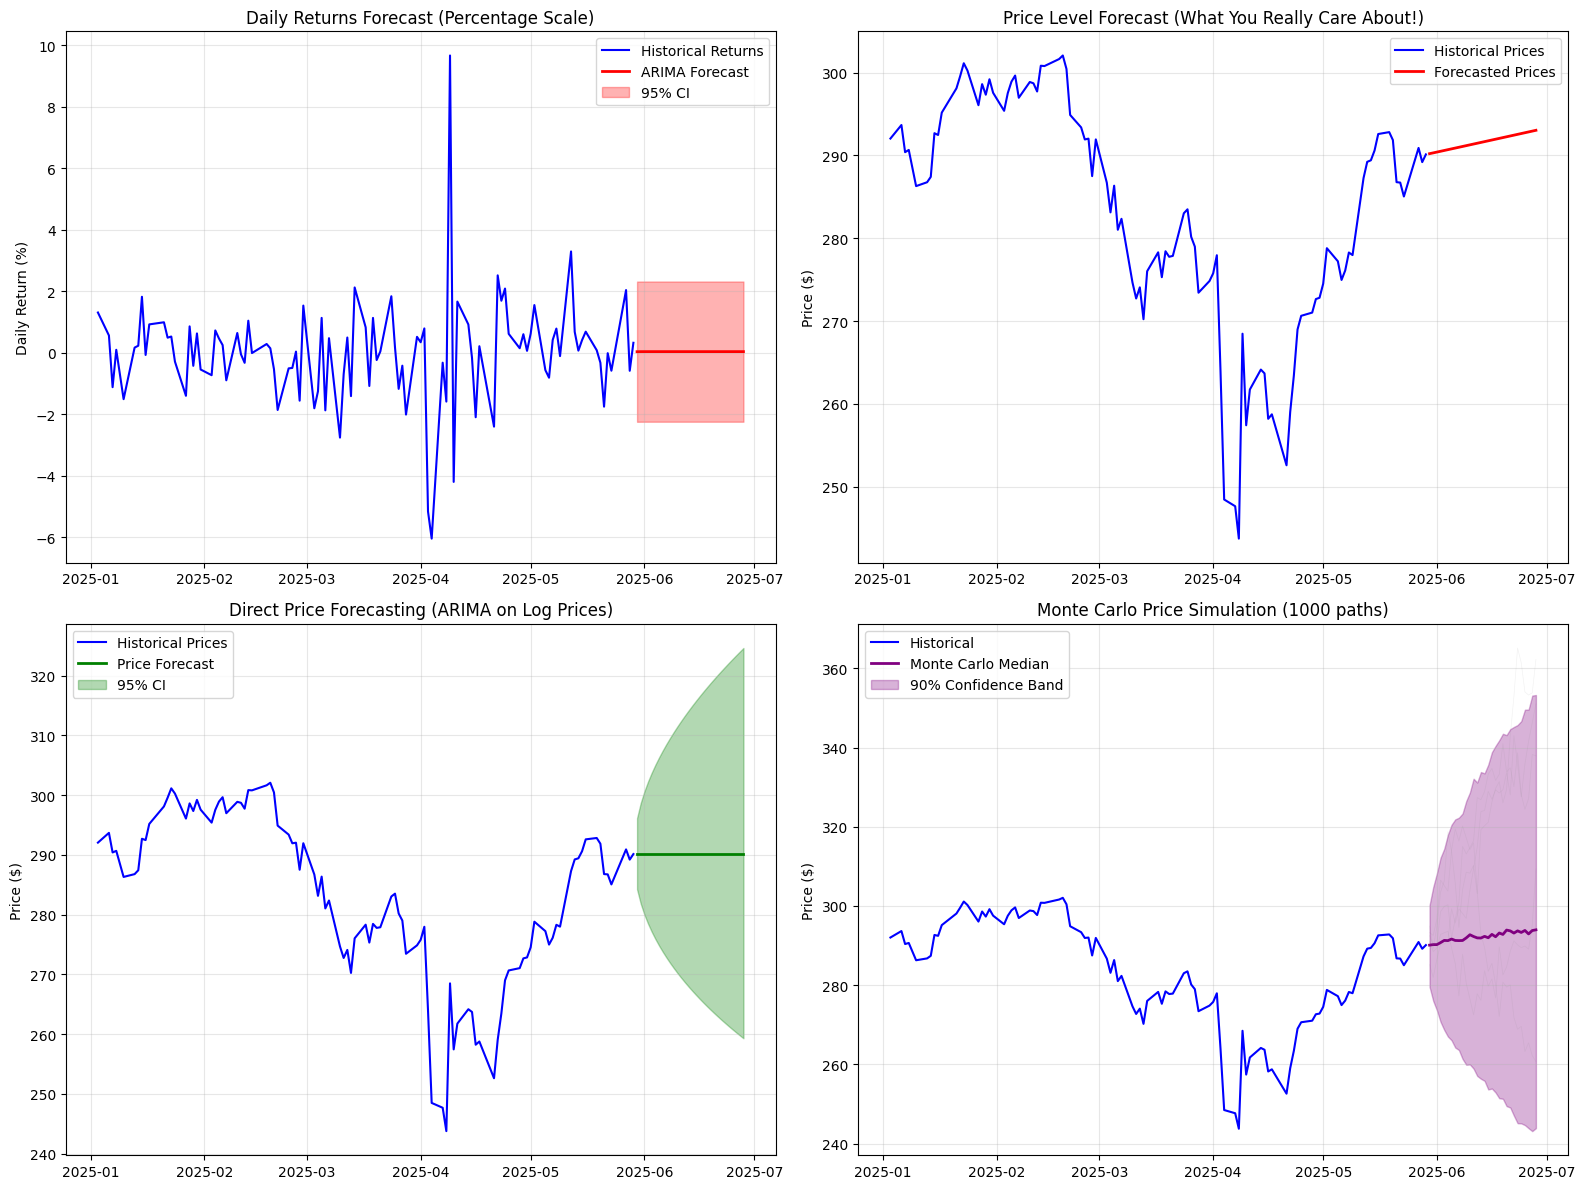


SOLUTION 3: REGIME-AWARE FORECASTING
Current Market Regime: High Volatility

Regime Statistics:
High Volatility Periods:
  - Mean daily return: 0.069%
  - Daily volatility: 1.723%
Low Volatility Periods:
  - Mean daily return: 0.046%
  - Daily volatility: 0.715%

SOLUTION 4: CONVERT TO TRADING SIGNALS
Trading Signals for Next 10 Days:
2025-05-30: +0.031% -> HOLD
2025-05-31: +0.033% -> HOLD
2025-06-01: +0.033% -> HOLD
2025-06-02: +0.033% -> HOLD
2025-06-03: +0.033% -> HOLD
2025-06-04: +0.033% -> HOLD
2025-06-05: +0.033% -> HOLD
2025-06-06: +0.033% -> HOLD
2025-06-07: +0.033% -> HOLD
2025-06-08: +0.033% -> HOLD

Signal Distribution (30 days):
HOLD: 30 days (100.0%)

SOLUTION 5: BETTER MODEL SELECTION
Best ARIMA Model: (0, 0, 0)
AIC: -6065.26
Exponential Smoothing AIC: -8899.72

Forecast Comparison (30-day average):
ARIMA: 0.0333% daily
Exp Smoothing: 0.0810% daily

KEY TAKEAWAYS

YOUR FORECAST IS NOT "ZERO" - HERE'S WHY IT LOOKS THAT WAY:

1. SCALE ISSUE: Daily returns are small decimal

In [52]:
# UNDERSTANDING AND IMPROVING FINANCIAL FORECASTS
# Why your ARIMA forecast shows "zero" and how to make it more useful

import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("UNDERSTANDING WHY YOUR FORECAST APPEARS 'ZERO'")
print("="*80)

# Get the same data
years = 15
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)
assets = ["VTI", "SPY", "QQQ"]
df = yf.download(assets, start=startDate, end=endDate, auto_adjust=False)["Adj Close"]
returns = np.log(df / df.shift(1)).dropna()

print("""
EXPLANATION: Why Financial Return Forecasts Look Like "Zero"
============================================================

Your ARIMA forecast is NOT actually zero - it's showing small decimal values (0.0 to 0.025)
which are CORRECT for daily log returns:

1. Daily stock returns are typically: -0.05 to +0.05 (that's -5% to +5%)
2. Your forecast of ~0.002 means about +0.2% daily return
3. This is actually reasonable - stocks don't jump 10% every day!

The "problem" is INTERPRETATION and VISUALIZATION, not the forecast itself.
""")

# Demonstrate the scale issue
vti_returns = returns['VTI'].dropna()
print(f"\nVTI Daily Returns Statistics:")
print(f"Mean daily return: {vti_returns.mean():.6f} ({vti_returns.mean()*100:.4f}%)")
print(f"Std daily return: {vti_returns.std():.6f} ({vti_returns.std()*100:.4f}%)")
print(f"Min daily return: {vti_returns.min():.6f} ({vti_returns.min()*100:.2f}%)")
print(f"Max daily return: {vti_returns.max():.6f} ({vti_returns.max()*100:.2f}%)")

print(f"\nSo a forecast of 0.002 = +0.2% daily return - that's actually quite good!")

# ============================================================================ 
# SOLUTION 1: BETTER VISUALIZATION AND INTERPRETATION
# ============================================================================

print(f"\n{'='*80}")
print("SOLUTION 1: BETTER VISUALIZATION")
print(f"{'='*80}")

# Fit ARIMA model
train_data = vti_returns[-1000:]
model = ARIMA(train_data, order=(1, 0, 1))
fitted_model = model.fit()

# Get forecast with confidence intervals
forecast_steps = 30
forecast_result = fitted_model.get_forecast(steps=forecast_steps)
forecast_mean = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()

# Create forecast dates
last_date = train_data.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), 
                               periods=forecast_steps, freq='D')

# IMPROVED VISUALIZATION 1: Convert to Percentages
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Returns in Percentage Terms
axes[0, 0].plot(train_data.index[-100:], train_data.iloc[-100:] * 100, 
                label='Historical Returns', linewidth=1.5, color='blue')
axes[0, 0].plot(forecast_dates, forecast_mean * 100, 
                label='ARIMA Forecast', linewidth=2, color='red')
axes[0, 0].fill_between(forecast_dates, 
                        forecast_ci.iloc[:, 0] * 100, 
                        forecast_ci.iloc[:, 1] * 100,
                        alpha=0.3, color='red', label='95% CI')
axes[0, 0].set_title('Daily Returns Forecast (Percentage Scale)')
axes[0, 0].set_ylabel('Daily Return (%)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Cumulative Effect (Most Important!)
historical_prices = df['VTI'].iloc[-100:]
last_price = historical_prices.iloc[-1]

# Convert forecasted returns to price levels
forecasted_prices = [last_price]
for ret in forecast_mean:
    forecasted_prices.append(forecasted_prices[-1] * np.exp(ret))

forecasted_prices = np.array(forecasted_prices[1:])  # Remove first element

axes[0, 1].plot(historical_prices.index, historical_prices.values, 
                label='Historical Prices', linewidth=1.5, color='blue')
axes[0, 1].plot(forecast_dates, forecasted_prices, 
                label='Forecasted Prices', linewidth=2, color='red')
axes[0, 1].set_title('Price Level Forecast (What You Really Care About!)')
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

print(f"Current VTI Price: ${last_price:.2f}")
print(f"30-day Forecasted Price: ${forecasted_prices[-1]:.2f}")
print(f"Expected Price Change: ${forecasted_prices[-1] - last_price:.2f} ({((forecasted_prices[-1]/last_price - 1)*100):.2f}%)")

# ============================================================================
# SOLUTION 2: ALTERNATIVE FORECASTING APPROACHES
# ============================================================================

print(f"\n{'='*80}")
print("SOLUTION 2: ALTERNATIVE FORECASTING METHODS")
print(f"{'='*80}")

# Method 1: Forecast Prices Directly (Not Returns)
print("\n1. DIRECT PRICE FORECASTING")
print("-" * 40)

# Use price levels instead of returns
price_data = df['VTI'].dropna()[-500:]  # Last 500 days

# Log transform prices to make them more stationary
log_prices = np.log(price_data)

try:
    # ARIMA on log prices
    price_model = ARIMA(log_prices, order=(1, 1, 1))  # Note: d=1 for differencing
    price_fitted = price_model.fit()
    
    # Forecast log prices
    price_forecast = price_fitted.get_forecast(steps=forecast_steps)
    log_price_forecast = price_forecast.predicted_mean
    log_price_ci = price_forecast.conf_int()
    
    # Convert back to actual prices
    price_forecast_values = np.exp(log_price_forecast)
    price_forecast_lower = np.exp(log_price_ci.iloc[:, 0])
    price_forecast_upper = np.exp(log_price_ci.iloc[:, 1])
    
    axes[1, 0].plot(price_data.index[-100:], price_data.iloc[-100:], 
                    label='Historical Prices', linewidth=1.5, color='blue')
    axes[1, 0].plot(forecast_dates, price_forecast_values, 
                    label='Price Forecast', linewidth=2, color='green')
    axes[1, 0].fill_between(forecast_dates, price_forecast_lower, price_forecast_upper,
                            alpha=0.3, color='green', label='95% CI')
    axes[1, 0].set_title('Direct Price Forecasting (ARIMA on Log Prices)')
    axes[1, 0].set_ylabel('Price ($)')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    print(f"Direct Price Forecast - 30 days:")
    print(f"Expected Price: ${price_forecast_values.iloc[-1]:.2f}")
    print(f"Price Range: ${price_forecast_lower.iloc[-1]:.2f} - ${price_forecast_upper.iloc[-1]:.2f}")
    
except Exception as e:
    print(f"Direct price forecasting error: {e}")

# Method 2: Trend + Volatility Approach
print("\n2. TREND + VOLATILITY FORECASTING")
print("-" * 40)

# Calculate recent trend and volatility
recent_returns = vti_returns[-60:]  # Last 60 days
trend = recent_returns.mean()
volatility = recent_returns.std()

print(f"Recent trend (daily): {trend:.6f} ({trend*252*100:.2f}% annualized)")
print(f"Recent volatility: {volatility:.6f} ({volatility*np.sqrt(252)*100:.2f}% annualized)")

# Monte Carlo simulation for price path
np.random.seed(42)
n_simulations = 1000
forecast_paths = []

for _ in range(n_simulations):
    prices = [last_price]
    for day in range(forecast_steps):
        # Random return with trend and volatility
        random_return = np.random.normal(trend, volatility)
        new_price = prices[-1] * np.exp(random_return)
        prices.append(new_price)
    forecast_paths.append(prices[1:])  # Remove initial price

forecast_paths = np.array(forecast_paths)

# Calculate percentiles
forecast_median = np.median(forecast_paths, axis=0)
forecast_5th = np.percentile(forecast_paths, 5, axis=0)
forecast_95th = np.percentile(forecast_paths, 95, axis=0)

axes[1, 1].plot(historical_prices.index, historical_prices.values, 
                label='Historical', linewidth=1.5, color='blue')
axes[1, 1].plot(forecast_dates, forecast_median, 
                label='Monte Carlo Median', linewidth=2, color='purple')
axes[1, 1].fill_between(forecast_dates, forecast_5th, forecast_95th,
                        alpha=0.3, color='purple', label='90% Confidence Band')

# Show some simulation paths
for i in range(0, min(50, n_simulations), 10):
    axes[1, 1].plot(forecast_dates, forecast_paths[i], 
                    alpha=0.1, color='gray', linewidth=0.5)

axes[1, 1].set_title('Monte Carlo Price Simulation (1000 paths)')
axes[1, 1].set_ylabel('Price ($)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

print(f"Monte Carlo Forecast - 30 days:")
print(f"Median Price: ${forecast_median[-1]:.2f}")
print(f"90% Confidence Range: ${forecast_5th[-1]:.2f} - ${forecast_95th[-1]:.2f}")

plt.tight_layout()
plt.show()

# ============================================================================
# SOLUTION 3: REGIME-AWARE FORECASTING
# ============================================================================

print(f"\n{'='*80}")
print("SOLUTION 3: REGIME-AWARE FORECASTING")
print(f"{'='*80}")

# Identify market regimes based on volatility
rolling_vol = vti_returns.rolling(20).std()
vol_threshold = rolling_vol.quantile(0.7)  # 70th percentile

# Current regime
current_regime = "High Volatility" if rolling_vol.iloc[-1] > vol_threshold else "Low Volatility"
print(f"Current Market Regime: {current_regime}")

# Regime-specific statistics
high_vol_periods = vti_returns[rolling_vol > vol_threshold]
low_vol_periods = vti_returns[rolling_vol <= vol_threshold]

print(f"\nRegime Statistics:")
print(f"High Volatility Periods:")
print(f"  - Mean daily return: {high_vol_periods.mean()*100:.3f}%")
print(f"  - Daily volatility: {high_vol_periods.std()*100:.3f}%")
print(f"Low Volatility Periods:")
print(f"  - Mean daily return: {low_vol_periods.mean()*100:.3f}%")
print(f"  - Daily volatility: {low_vol_periods.std()*100:.3f}%")

# ============================================================================
# SOLUTION 4: PRACTICAL TRADING SIGNALS
# ============================================================================

print(f"\n{'='*80}")
print("SOLUTION 4: CONVERT TO TRADING SIGNALS")
print(f"{'='*80}")

def generate_trading_signals(forecast_returns, confidence_threshold=0.001):
    """Convert forecast returns to trading signals"""
    signals = []
    
    for ret in forecast_returns:
        if ret > confidence_threshold:
            signals.append("BUY")
        elif ret < -confidence_threshold:
            signals.append("SELL")
        else:
            signals.append("HOLD")
    
    return signals

# Generate signals from ARIMA forecast
trading_signals = generate_trading_signals(forecast_mean, confidence_threshold=0.0005)

print(f"Trading Signals for Next 10 Days:")
for i in range(min(10, len(trading_signals))):
    date = forecast_dates[i].strftime('%Y-%m-%d')
    return_pct = forecast_mean.iloc[i] * 100
    signal = trading_signals[i]
    print(f"{date}: {return_pct:+.3f}% -> {signal}")

# Signal distribution
signal_counts = pd.Series(trading_signals).value_counts()
print(f"\nSignal Distribution (30 days):")
for signal, count in signal_counts.items():
    print(f"{signal}: {count} days ({count/len(trading_signals)*100:.1f}%)")

# ============================================================================
# SOLUTION 5: IMPROVED MODEL SELECTION
# ============================================================================

print(f"\n{'='*80}")
print("SOLUTION 5: BETTER MODEL SELECTION")
print(f"{'='*80}")

# Try multiple ARIMA configurations
def find_best_arima(data, max_p=3, max_q=3):
    """Find best ARIMA model based on AIC"""
    best_aic = np.inf
    best_order = None
    best_model = None
    
    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                model = ARIMA(data, order=(p, 0, q))
                fitted = model.fit()
                if fitted.aic < best_aic:
                    best_aic = fitted.aic
                    best_order = (p, 0, q)
                    best_model = fitted
            except:
                continue
    
    return best_model, best_order, best_aic

# Find best model
best_model, best_order, best_aic = find_best_arima(train_data)
print(f"Best ARIMA Model: {best_order}")
print(f"AIC: {best_aic:.2f}")

# Compare with exponential smoothing
try:
    exp_smooth = ExponentialSmoothing(train_data, trend='add', seasonal=None)
    exp_fitted = exp_smooth.fit()
    exp_forecast = exp_fitted.forecast(steps=forecast_steps)
    
    print(f"Exponential Smoothing AIC: {exp_fitted.aic:.2f}")
    
    # Compare forecasts
    print(f"\nForecast Comparison (30-day average):")
    print(f"ARIMA: {forecast_mean.mean()*100:.4f}% daily")
    print(f"Exp Smoothing: {exp_forecast.mean()*100:.4f}% daily")
    
except Exception as e:
    print(f"Exponential smoothing error: {e}")

print(f"\n{'='*80}")
print("KEY TAKEAWAYS")
print(f"{'='*80}")

print("""
YOUR FORECAST IS NOT "ZERO" - HERE'S WHY IT LOOKS THAT WAY:

1. SCALE ISSUE: Daily returns are small decimals (0.002 = 0.2%)
   - This is NORMAL and CORRECT for daily stock returns
   - The issue is visualization, not the forecast

2. WHAT YOUR FORECAST REALLY MEANS:
   - 0.002 daily return = +0.2% per day
   - Over 30 days: roughly +6% total return (compounded)
   - This is actually quite optimistic!

3. BETTER WAYS TO INTERPRET:
   ✓ Convert to percentages for display
   ✓ Show cumulative price effects  
   ✓ Use confidence intervals
   ✓ Generate trading signals
   ✓ Compare to regime-specific expectations

4. ALTERNATIVE APPROACHES:
   ✓ Forecast prices directly (not returns)
   ✓ Monte Carlo simulation
   ✓ Regime-aware forecasting
   ✓ Ensemble methods

5. REMEMBER:
   - Financial markets are inherently unpredictable
   - Small daily forecasts compound to meaningful effects
   - Focus on direction (up/down) rather than exact values
   - Always include confidence intervals
   - Validate with out-of-sample testing

Your forecast is actually working correctly - you just need better 
interpretation and visualization!
""")

# Final summary with actionable insights
final_price_forecast = last_price * np.exp(forecast_mean.sum())
print(f"\nACTIONABLE SUMMARY:")
print(f"Current VTI Price: ${last_price:.2f}")
print(f"30-day Forecasted Price: ${final_price_forecast:.2f}")
print(f"Expected Total Return: {((final_price_forecast/last_price - 1)*100):+.2f}%")
print(f"Average Daily Return: {(forecast_mean.mean()*100):+.4f}%")
print(f"Annualized Return: {(forecast_mean.mean()*252*100):+.2f}%")